In [1]:
# import pandas data set
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit
from matplotlib.ticker import ScalarFormatter
import geopandas as gpd
import matplotlib.patches as mpatches
import warnings
warnings.filterwarnings("ignore")

# EDA

In [2]:
# Loading the dataset:
df1 = pd.read_csv('https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/PEA11/CSV/1.0/en')

In [3]:
# Displaying first 5 rows:
df1.head()

,STATISTIC,STATISTIC Label,TLIST(A1),Year,C02076V03371,Single Year of Age,C02199V02655,Sex,UNIT,VALUE
0,PEA11,Population estimates from 1926,1926,1926,-,All ages,-,Both sexes,Number,2971992
1,PEA11,Population estimates from 1926,1926,1926,-,All ages,1,Male,Number,1506889
2,PEA11,Population estimates from 1926,1926,1926,-,All ages,2,Female,Number,1465103
3,PEA11,Population estimates from 1926,1926,1926,200,Under 1 year,-,Both sexes,Number,55391
4,PEA11,Population estimates from 1926,1926,1926,200,Under 1 year,1,Male,Number,28084


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11817 entries, 0 to 11816
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   STATISTIC           11817 non-null  object
 1   STATISTIC Label     11817 non-null  object
 2   TLIST(A1)           11817 non-null  int64 
 3   Year                11817 non-null  int64 
 4   C02076V03371        11817 non-null  object
 5   Single Year of Age  11817 non-null  object
 6   C02199V02655        11817 non-null  object
 7   Sex                 11817 non-null  object
 8   UNIT                11817 non-null  object
 9   VALUE               11817 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 923.3+ KB


In [5]:
null_values = df1.isnull().sum()
null_values

STATISTIC             0
STATISTIC Label       0
TLIST(A1)             0
Year                  0
C02076V03371          0
Single Year of Age    0
C02199V02655          0
Sex                   0
UNIT                  0
VALUE                 0
dtype: int64

In [6]:
# Dropping the 'STATISTIC Label' column it's irrelevant for the analysis
df1_col_drop = ['STATISTIC','STATISTIC Label','TLIST(A1)','C02076V03371','C02199V02655','UNIT']
df1.drop(df1_col_drop ,axis=1, inplace=True) 

In [7]:
# Renaming the columns
df1 = df1.rename(columns={'Single Year of Age': 'Age_Group','VALUE':'Population'})

In [8]:
df1

,Year,Age_Group,Sex,Population
0,1926,All ages,Both sexes,2971992
1,1926,All ages,Male,1506889
2,1926,All ages,Female,1465103
3,1926,Under 1 year,Both sexes,55391
4,1926,Under 1 year,Male,28084
...,...,...,...,...
11812,2023,98 years,Male,197
11813,2023,98 years,Female,632
11814,2023,99 years and over,Both sexes,1600
11815,2023,99 years and over,Male,352


Let's compare if numbers look great when breaking down All ages and Both sexes in one df. The rest will go into another df to compare if there are differences.

In [9]:
#All Ages and both sexes:
df1a = df1[(df1['Age_Group'] == 'All ages') & (df1['Sex'] == 'Both sexes')]
df1b = df1a.groupby('Year')['Population'].sum().reset_index() # Creating a df

In [10]:
# !All Ages and both sexes:
df1c =df1[(df1['Age_Group'] != 'All ages') & (df1['Sex'] != 'Both sexes')]
df1d = df1b.groupby('Year')['Population'].sum().reset_index() # Creating a df

In [11]:
df1d  = df1d .rename(columns={'Population': 'Population_2'}) # Renaming column Population to merge

In [12]:
df1b= pd.merge(df1b,df1d, on='Year') # Merging both df's

In [13]:
df1b['Pop_Diff'] = df1b['Population']-df1b['Population_2'] # Substracting Population to see if there are any differences

# When breaking down into categories there are no differences for the population.

In [14]:
df1b

,Year,Population,Population_2,Pop_Diff
0,1926,2971992,2971992,0
1,1936,2968420,2968420,0
2,1946,2955107,2955107,0
3,1951,2960593,2960593,0
4,1961,2818341,2818341,0
5,1966,2884002,2884002,0
6,1971,2978248,2978248,0
7,1979,3368217,3368217,0
8,1981,3443405,3443405,0
9,1986,3540643,3540643,0


# Population Growth

For this dataset numbers match across categories, I'll be organising the data for sex categories  
as in Both Sexes, Male and Female.

In [15]:
df1

,Year,Age_Group,Sex,Population
0,1926,All ages,Both sexes,2971992
1,1926,All ages,Male,1506889
2,1926,All ages,Female,1465103
3,1926,Under 1 year,Both sexes,55391
4,1926,Under 1 year,Male,28084
...,...,...,...,...
11812,2023,98 years,Male,197
11813,2023,98 years,Female,632
11814,2023,99 years and over,Both sexes,1600
11815,2023,99 years and over,Male,352


In [16]:
# Dropping rows based on criteria
df1 = df1[~((df1['Sex'] == 'Both sexes') & (df1['Age_Group'] != 'All ages'))] # Drop both sexes different that All ages
df1 = df1[~((df1['Sex'] != 'Both sexes') & (df1['Age_Group'] == 'All ages'))] # Drop Male and Female All ages


Using a Pivot to group all values.

In [17]:
pivot_df1 = df1.pivot_table(index=['Year'],columns='Sex', values='Population', aggfunc='sum').reset_index()


In [18]:
pivot_df1

Sex,Year,Both sexes,Female,Male
0,1926,2971992,1465103,1506889
1,1936,2968420,1447966,1520454
2,1946,2955107,1460230,1494877
3,1951,2960593,1453996,1506597
4,1961,2818341,1401792,1416549
5,1966,2884002,1434970,1449032
6,1971,2978248,1482488,1495760
7,1979,3368217,1674945,1693272
8,1981,3443405,1714051,1729354
9,1986,3540643,1770953,1769690


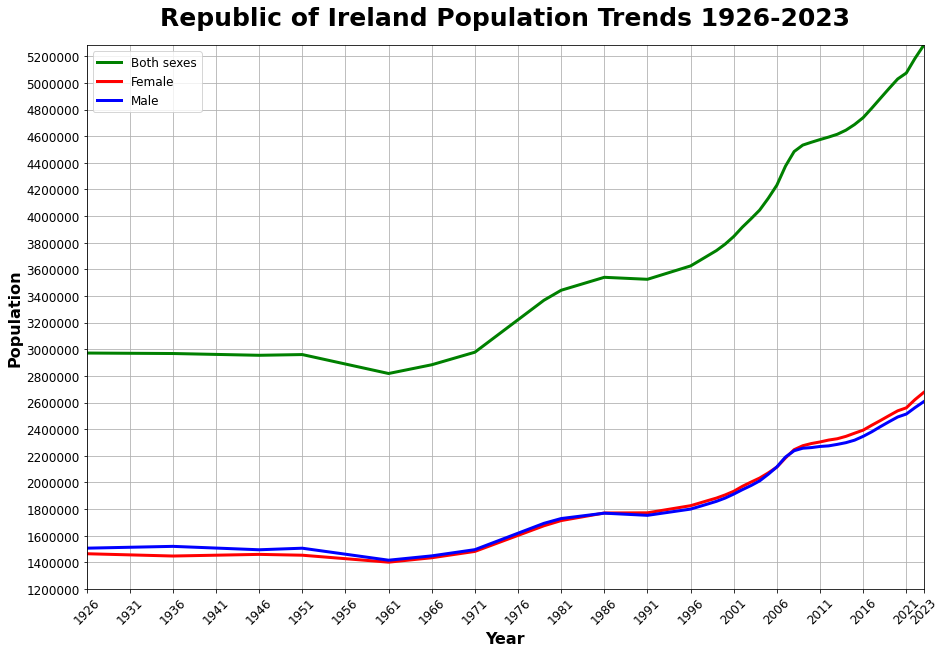

In [19]:
# Plotting
plt.figure(figsize=(15, 10))
plt.plot(pivot_df1['Year'], pivot_df1['Both sexes'],color='green', label='Both sexes',linewidth=3)
plt.plot(pivot_df1['Year'], pivot_df1['Female'],color='red', label='Female',linewidth=3)
plt.plot(pivot_df1['Year'], pivot_df1['Male'],color='blue',label='Male',linewidth=3)

# Lables
plt.title('Republic of Ireland Population Trends 1926-2023', loc="center", pad=20, fontsize=25, fontweight="bold")
plt.xlabel('Year', fontsize=16, fontweight="bold")
plt.ylabel('Population', fontsize=16, fontweight="bold")
plt.ticklabel_format(style='plain', axis='y') # Avoiding scientific notation
plt.yticks(range(1200000, 5200000+100000, 200000),fontsize=12) # Creating a range having more values it's useful!!
plt.ylim(1200000, 5281612) # Setting limit axis y
plt.xticks(list(range(1926, 2024, 5)) + [2023], rotation=45, fontsize=12)  # Every 5 years a year is displayed...
plt.xlim(1926, 2023) # Setting limit axis x
plt.legend(fontsize=12)                                                   
plt.grid(True) #Helps locating points
plt.show()

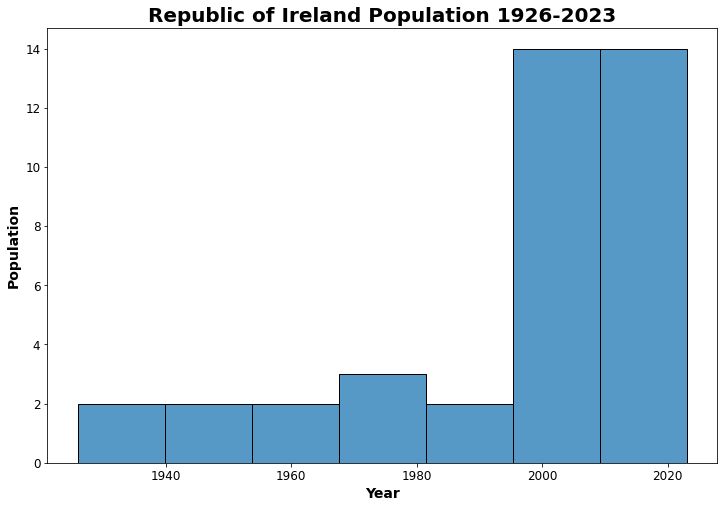

In [20]:
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.histplot(pivot_df1.Year)

# Set the properties of the axes
ax.set_xlabel('Year', fontsize=14, fontweight='bold')
ax.set_ylabel('Population', fontsize=14, fontweight='bold')
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_title('Republic of Ireland Population 1926-2023', fontsize=20, fontweight='bold');

# Population Pyramids

## EDA

In [21]:
df1_backup = df1.copy()

In [22]:
df1=df1_backup.copy()

In [23]:
#Normalising Population
df1['Population'] = df1['Population'] / 100000

In [24]:
df1.head()

,Year,Age_Group,Sex,Population
0,1926,All ages,Both sexes,29.71992
4,1926,Under 1 year,Male,0.28084
5,1926,Under 1 year,Female,0.27307
7,1926,1 year,Male,0.28374
8,1926,1 year,Female,0.27502


In [25]:
def group_age_by_5_years(df1):
    df1['Age_Group'] = df1['Age_Group'].str.extract('(\d+)').astype(float)
    df1['Age_Group'] = pd.cut(df1['Age_Group'], bins=range(0, 105, 5), labels=[f'{i}-{i + 4}' for i in range(0, 100, 5)], right=False)
    return df1

# Applying the function
df1 = group_age_by_5_years(df1)

To achieve this we need to first create a pivot table to sumarize all values

In [26]:
piramid_df = df1.pivot_table(index=['Year','Age_Group'],columns='Sex', values='Population', aggfunc='sum').reset_index()

In [27]:
piramid_df

Sex,Year,Age_Group,Both sexes,Female,Male
0,1926,0-4,0.0,1.41540,1.46173
1,1926,5-9,0.0,1.39869,1.44764
2,1926,10-14,0.0,1.44719,1.50814
3,1926,15-19,0.0,1.40140,1.46047
4,1926,20-24,0.0,1.15713,1.24518
...,...,...,...,...,...
775,2023,75-79,0.0,0.84271,0.77819
776,2023,80-84,0.0,0.55611,0.46149
777,2023,85-89,0.0,0.32790,0.22958
778,2023,90-94,0.0,0.15799,0.08271


In [28]:
piramid_df_backup = piramid_df.copy()

In [29]:
piramid_df["Female_Left"] = 0

In [30]:
piramid_df["Female_Width"] = piramid_df["Female"]

In [31]:
piramid_df["Male_Left"] = -piramid_df["Male"]

In [32]:
piramid_df["Male_Width"] = piramid_df["Male"]

In [33]:
piramid_df

Sex,Year,Age_Group,Both sexes,Female,Male,Female_Left,Female_Width,Male_Left,Male_Width
0,1926,0-4,0.0,1.41540,1.46173,0,1.41540,-1.46173,1.46173
1,1926,5-9,0.0,1.39869,1.44764,0,1.39869,-1.44764,1.44764
2,1926,10-14,0.0,1.44719,1.50814,0,1.44719,-1.50814,1.50814
3,1926,15-19,0.0,1.40140,1.46047,0,1.40140,-1.46047,1.46047
4,1926,20-24,0.0,1.15713,1.24518,0,1.15713,-1.24518,1.24518
...,...,...,...,...,...,...,...,...,...
775,2023,75-79,0.0,0.84271,0.77819,0,0.84271,-0.77819,0.77819
776,2023,80-84,0.0,0.55611,0.46149,0,0.55611,-0.46149,0.46149
777,2023,85-89,0.0,0.32790,0.22958,0,0.32790,-0.22958,0.22958
778,2023,90-94,0.0,0.15799,0.08271,0,0.15799,-0.08271,0.08271


Filtering by years 1926, 1961, 1996, 2023

In [34]:
piramid_df_1926 = piramid_df[piramid_df['Year'] == 1926]
piramid_df_1961 = piramid_df[piramid_df['Year'] == 1961]
piramid_df_1996 = piramid_df[piramid_df['Year'] == 1996]
piramid_df_2023 = piramid_df[piramid_df['Year'] == 2023]

In [35]:
piramid_df_1926

Sex,Year,Age_Group,Both sexes,Female,Male,Female_Left,Female_Width,Male_Left,Male_Width
0,1926,0-4,0.0,1.41540,1.46173,0,1.41540,-1.46173,1.46173
1,1926,5-9,0.0,1.39869,1.44764,0,1.39869,-1.44764,1.44764
2,1926,10-14,0.0,1.44719,1.50814,0,1.44719,-1.50814,1.50814
3,1926,15-19,0.0,1.40140,1.46047,0,1.40140,-1.46047,1.46047
4,1926,20-24,0.0,1.15713,1.24518,0,1.15713,-1.24518,1.24518
5,1926,25-29,0.0,1.08755,1.06646,0,1.08755,-1.06646,1.06646
6,1926,30-34,0.0,0.90798,0.92502,0,0.90798,-0.92502,0.92502
7,1926,35-39,0.0,0.88410,0.87349,0,0.88410,-0.87349,0.87349
8,1926,40-44,0.0,0.83035,0.86050,0,0.83035,-0.86050,0.86050
9,1926,45-49,0.0,0.81883,0.87010,0,0.81883,-0.87010,0.87010


Serious problem when plotting the second Population Pyramid, I need it to reset the index
for this piece of code to start working "for idx in range(len(piramid_df_2023)):
    plt.text(x=piramid_df_2023["Male_Left"][idx]-0.1, y=idx, s="{:.3f} %"."

In [36]:
piramid_df_1996 = piramid_df_1996.reset_index(drop=True)
piramid_df_2023 = piramid_df_2023.reset_index(drop=True)

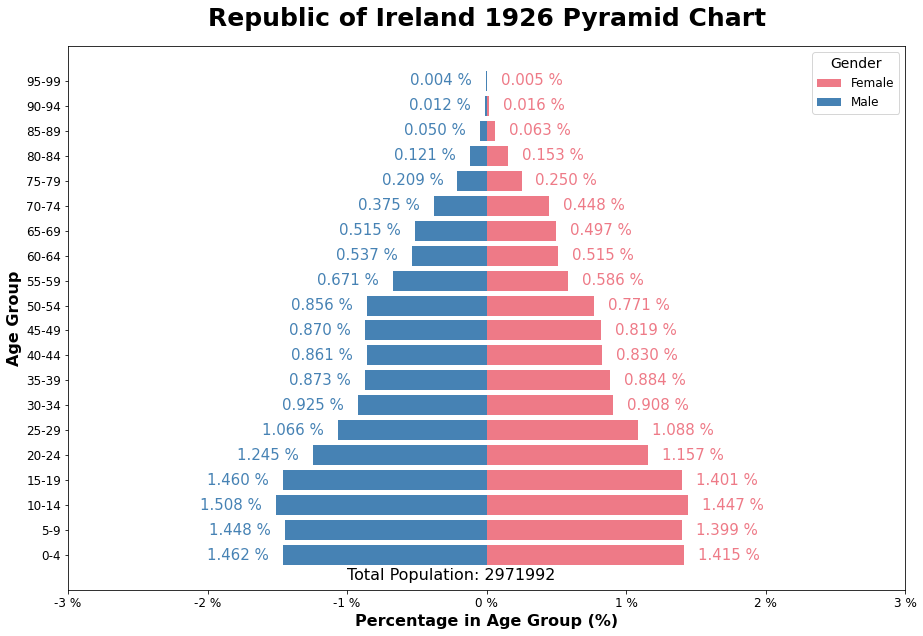

In [37]:
#code source from https://coderzcolumn.com/tutorials/data-science/population-pyramid-chart-using-matplotlib
female_color = "#ee7a87"
male_color = "#4682b4"

fig = plt.figure(figsize=(15,10))

plt.barh(y=piramid_df_1926["Age_Group"], width=piramid_df_1926["Female_Width"], color="#ee7a87", label="Female");
plt.barh(y=piramid_df_1926["Age_Group"], width=piramid_df_1926["Male_Width"], left=piramid_df_1926["Male_Left"],
         color="#4682b4", label="Male");



for idx in range(len(piramid_df_1926)):
    plt.text(x=piramid_df_1926["Male_Left"][idx]-0.1, y=idx, s="{:.3f} %".format(piramid_df_1926["Male"][idx]),
             ha="right", va="center",
             fontsize=15, color="#4682b4");
    plt.text(x=piramid_df_1926["Female_Width"][idx]+0.1, y=idx, s="{:.3f} %".format(piramid_df_1926["Female"][idx]),
             ha="left", va="center",
             fontsize=15, color="#ee7a87");

piramid_df_1926['total_population'] = (piramid_df_1926['Female'] + piramid_df_1926['Male'])*100000
total_population =int(piramid_df_1926['total_population'].sum()) #Adding and converting to int to eliminate .0
plt.xlim(-3,3);

plt.xticks(range(-3,4), ["{} %".format(i) for i in range(-3,4)], fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc="best",fontsize=12,title='Gender',title_fontsize=14); 
plt.xlabel("Percentage in Age Group (%)", fontsize=16, fontweight="bold")
plt.ylabel("Age Group", fontsize=16, fontweight="bold")
plt.title("Republic of Ireland 1926 Pyramid Chart", loc="center", pad=20, fontsize=25, fontweight="bold")

plt.text(-1, -1, f'Total Population: {total_population}', fontsize=16);

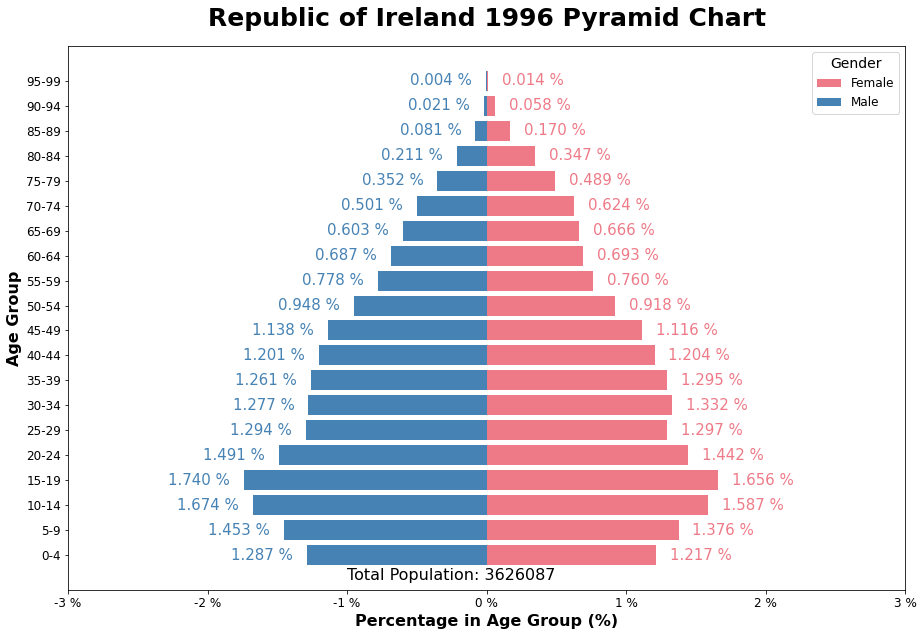

In [38]:
#code source from https://coderzcolumn.com/tutorials/data-science/population-pyramid-chart-using-matplotlib
female_color = "#ee7a87"
male_color = "#4682b4"

fig = plt.figure(figsize=(15,10))

plt.barh(y=piramid_df_1996["Age_Group"], width=piramid_df_1996["Female_Width"], color="#ee7a87", label="Female");
plt.barh(y=piramid_df_1996["Age_Group"], width=piramid_df_1996["Male_Width"], left=piramid_df_1996["Male_Left"],
         color="#4682b4", label="Male");



for idx in range(len(piramid_df_1996)):
    plt.text(x=piramid_df_1996["Male_Left"][idx]-0.1, y=idx, s="{:.3f} %".format(piramid_df_1996["Male"][idx]),
             ha="right", va="center",
             fontsize=15, color="#4682b4");
    plt.text(x=piramid_df_1996["Female_Width"][idx]+0.1, y=idx, s="{:.3f} %".format(piramid_df_1996["Female"][idx]),
             ha="left", va="center",
             fontsize=15, color="#ee7a87");

piramid_df_1996['total_population'] = (piramid_df_1996['Female'] + piramid_df_1996['Male'])*100000
total_population =int(piramid_df_1996['total_population'].sum()) #Adding and converting to int to eliminate .0
plt.xlim(-3,3);

plt.xticks(range(-3,4), ["{} %".format(i) for i in range(-3,4)], fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc="best",fontsize=12,title='Gender',title_fontsize=14); 
plt.xlabel("Percentage in Age Group (%)", fontsize=16, fontweight="bold")
plt.ylabel("Age Group", fontsize=16, fontweight="bold")
plt.title("Republic of Ireland 1996 Pyramid Chart", loc="center", pad=20, fontsize=25, fontweight="bold")

plt.text(-1, -1, f'Total Population: {total_population}', fontsize=16);

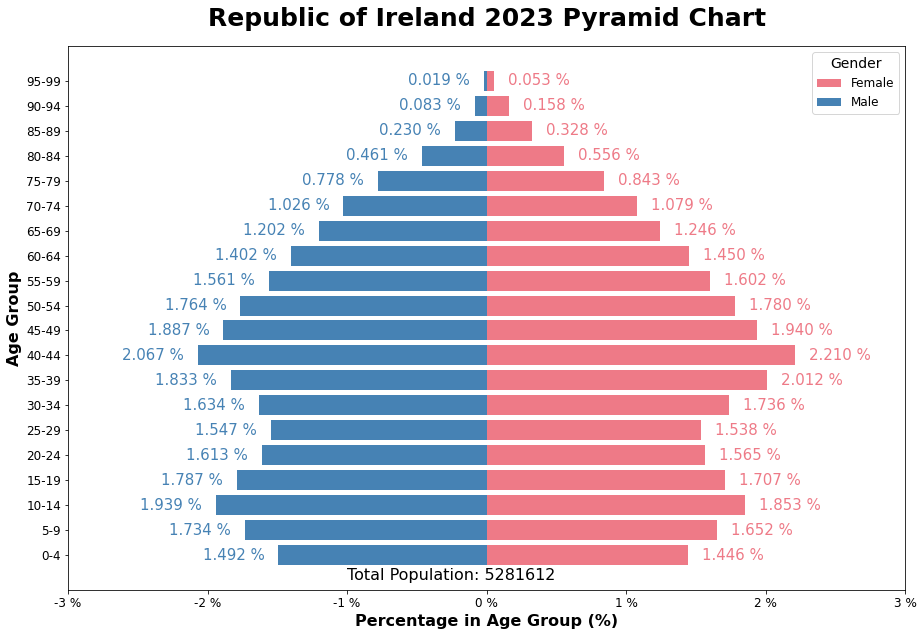

In [39]:
#code source from https://coderzcolumn.com/tutorials/data-science/population-pyramid-chart-using-matplotlib
female_color = "#ee7a87"
male_color = "#4682b4"

fig = plt.figure(figsize=(15,10))

plt.barh(y=piramid_df_2023["Age_Group"], width=piramid_df_2023["Female_Width"], color="#ee7a87", label="Female");
plt.barh(y=piramid_df_2023["Age_Group"], width=piramid_df_2023["Male_Width"], left=piramid_df_2023["Male_Left"],
         color="#4682b4", label="Male");



for idx in range(len(piramid_df_2023)):
    plt.text(x=piramid_df_2023["Male_Left"][idx]-0.1, y=idx, s="{:.3f} %".format(piramid_df_2023["Male"][idx]),
             ha="right", va="center",
             fontsize=15, color="#4682b4");
    plt.text(x=piramid_df_2023["Female_Width"][idx]+0.1, y=idx, s="{:.3f} %".format(piramid_df_2023["Female"][idx]),
             ha="left", va="center",
             fontsize=15, color="#ee7a87");

piramid_df_2023['total_population'] = (piramid_df_2023['Female'] + piramid_df_2023['Male'])*100000
total_population =int(piramid_df_2023['total_population'].sum()) #Adding and converting to int to eliminate .0
plt.xlim(-3,3);

plt.xticks(range(-3,4), ["{} %".format(i) for i in range(-3,4)], fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc="best",fontsize=12,title='Gender',title_fontsize=14); 
plt.xlabel("Percentage in Age Group (%)", fontsize=16, fontweight="bold")
plt.ylabel("Age Group", fontsize=16, fontweight="bold")
plt.title("Republic of Ireland 2023 Pyramid Chart", loc="center", pad=20, fontsize=25, fontweight="bold")

plt.text(-1, -1, f'Total Population: {total_population}', fontsize=16);

# Population density maps

## EDA

In [40]:
# Loading the dataset:
df2=pd.read_csv('https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/PEA07/CSV/1.0/en')

In [41]:
# Displaying first 5 rows:
df2.head()

,STATISTIC,Statistic Label,C02076V02508,Age Group,C02199V02655,Sex,C02196V02652,Regional Authority Area,TLIST(A1),Year,UNIT,VALUE
0,PEA07,Estimated Population (Persons in April),205,0 - 4 years,-,Both sexes,-,State,1996,1996,Thousand,250.4
1,PEA07,Estimated Population (Persons in April),205,0 - 4 years,-,Both sexes,-,State,1997,1997,Thousand,250.0
2,PEA07,Estimated Population (Persons in April),205,0 - 4 years,-,Both sexes,-,State,1998,1998,Thousand,253.7
3,PEA07,Estimated Population (Persons in April),205,0 - 4 years,-,Both sexes,-,State,1999,1999,Thousand,259.8
4,PEA07,Estimated Population (Persons in April),205,0 - 4 years,-,Both sexes,-,State,2000,2000,Thousand,266.2


In [42]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11286 entries, 0 to 11285
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   STATISTIC                11286 non-null  object 
 1   Statistic Label          11286 non-null  object 
 2   C02076V02508             11286 non-null  object 
 3   Age Group                11286 non-null  object 
 4   C02199V02655             11286 non-null  object 
 5   Sex                      11286 non-null  object 
 6   C02196V02652             11286 non-null  object 
 7   Regional Authority Area  11286 non-null  object 
 8   TLIST(A1)                11286 non-null  int64  
 9   Year                     11286 non-null  int64  
 10  UNIT                     11286 non-null  object 
 11  VALUE                    11286 non-null  float64
dtypes: float64(1), int64(2), object(9)
memory usage: 1.0+ MB


In [43]:
# Dropping the 'STATISTIC Label' column it's irrelevant for the analysis
df2_col_drop = ['STATISTIC','Statistic Label','C02076V02508','C02199V02655','C02196V02652','TLIST(A1)','UNIT']
df2.drop(df2_col_drop ,axis=1, inplace=True) 

In [44]:
df2['VALUE'] = df2['VALUE'].apply(lambda x: x * 1000)

In [45]:
df2

,Age Group,Sex,Regional Authority Area,Year,VALUE
0,0 - 4 years,Both sexes,State,1996,250400.0
1,0 - 4 years,Both sexes,State,1997,250000.0
2,0 - 4 years,Both sexes,State,1998,253700.0
3,0 - 4 years,Both sexes,State,1999,259800.0
4,0 - 4 years,Both sexes,State,2000,266200.0
...,...,...,...,...,...
11281,All ages,Female,South-West,2013,338700.0
11282,All ages,Female,South-West,2014,341600.0
11283,All ages,Female,South-West,2015,343300.0
11284,All ages,Female,South-West,2016,345300.0


In [46]:
# Renaming the columns
df2 = df2.rename(columns={'Age Group': 'Age_Group','Regional Authority Area':'Area','VALUE':'Population'})

In [47]:
# Both sexes and State
df2a = df2[(df2['Sex'] == 'Both sexes') & (df2['Area'] == 'State')]
df2b = df2a.groupby('Year')['Population'].sum().reset_index() # Creating a df
df2b

,Year,Population
0,1996,7252000.0
1,1997,7328300.0
2,1998,7406000.0
3,1999,7483200.0
4,2000,7579200.0
5,2001,7694200.0
6,2002,7834400.0
7,2003,7960000.0
8,2004,8090400.0
9,2005,8267600.0


In [48]:
# !=Both sexes and != State
df2c = df2[(df2['Sex'] != 'Both sexes') & (df2['Area'] != 'State')]
df2d = df2c.groupby('Year')['Population'].sum().reset_index() # Creating a df
df2d

,Year,Population
0,1996,7252700.0
1,1997,7329000.0
2,1998,7406900.0
3,1999,7484500.0
4,2000,7579300.0
5,2001,7695100.0
6,2002,7834700.0
7,2003,7960300.0
8,2004,8090300.0
9,2005,8266500.0


In [49]:
df2d  = df2d .rename(columns={'Population': 'Population_2'}) # Renaming column Population to merge

In [50]:
df2b= pd.merge(df2b,df2d, on='Year') # Merging both df's

In [51]:
df2b['Pop_Diff'] = df2b['Population']-df2b['Population_2'] # Substracting Population to see if there are any differences

In [52]:
df2b

,Year,Population,Population_2,Pop_Diff
0,1996,7252000.0,7252700.0,-700.0
1,1997,7328300.0,7329000.0,-700.0
2,1998,7406000.0,7406900.0,-900.0
3,1999,7483200.0,7484500.0,-1300.0
4,2000,7579200.0,7579300.0,-100.0
5,2001,7694200.0,7695100.0,-900.0
6,2002,7834400.0,7834700.0,-300.0
7,2003,7960000.0,7960300.0,-300.0
8,2004,8090400.0,8090300.0,100.0
9,2005,8267600.0,8266500.0,1100.0


There are differences, not big but numbers not matching as they should be.


In [53]:
df2

,Age_Group,Sex,Area,Year,Population
0,0 - 4 years,Both sexes,State,1996,250400.0
1,0 - 4 years,Both sexes,State,1997,250000.0
2,0 - 4 years,Both sexes,State,1998,253700.0
3,0 - 4 years,Both sexes,State,1999,259800.0
4,0 - 4 years,Both sexes,State,2000,266200.0
...,...,...,...,...,...
11281,All ages,Female,South-West,2013,338700.0
11282,All ages,Female,South-West,2014,341600.0
11283,All ages,Female,South-West,2015,343300.0
11284,All ages,Female,South-West,2016,345300.0


In [54]:
# Dropping rows based on criteria
df2 = df2[~((df2['Sex'] == 'Both sexes') | (df2['Area'] == 'State') | (df2['Age_Group'] != 'All ages'))]



In [55]:
df2.reset_index(drop=True,inplace=True)
# Display the modified DataFrame
df2

,Age_Group,Sex,Area,Year,Population
0,All ages,Male,Border,1996,177600.0
1,All ages,Male,Border,1997,205400.0
2,All ages,Male,Border,1998,206700.0
3,All ages,Male,Border,1999,208600.0
4,All ages,Male,Border,2000,211300.0
...,...,...,...,...,...
347,All ages,Female,South-West,2013,338700.0
348,All ages,Female,South-West,2014,341600.0
349,All ages,Female,South-West,2015,343300.0
350,All ages,Female,South-West,2016,345300.0


In [56]:
# Finding the sum of 'VALUE' per 'Area', 'Year', and 'Sex'
df2_Sum_Area_Year = df2.groupby(['Year','Area'])['Population'].sum().reset_index()

# Converting the series to a DataFrame
df2_Sum_Area_Year = pd.DataFrame(df2_Sum_Area_Year)

df2_Sum_Area_Year

,Year,Area,Population
0,1996,Border,352400.0
1,1996,Dublin,407300.0
2,1996,Mid-East,1058300.0
3,1996,Mid-West,205500.0
4,1996,Midland,347400.0
...,...,...,...
171,2017,Mid-West,387400.0
172,2017,Midland,297100.0
173,2017,South-East,515300.0
174,2017,South-West,691400.0


Change Midland to Midland to match with .shp file

In [57]:

df2_Sum_Area_Year['Area'] = df2_Sum_Area_Year['Area'].str.replace('Midland', 'Midlands')


In [58]:
# Filtering Year 1996
map1996 = df2_Sum_Area_Year[df2_Sum_Area_Year['Year'] == 1996]


In [59]:
# Filtering Year 2017
map2017 = df2_Sum_Area_Year[df2_Sum_Area_Year['Year'] == 2017]


## Important information for the population maps:

1. I've downloaded the .shp files from here: https://dataosi.opendata.arcgis.com/datasets/965d309475cd44a7885e883a7479bd00/explore

2. I've looked up this website to see how to plot using .shp files:
https://github.com/beepscore/census_play/blob/master/us_states.ipynb

Population density map for 1996

In [60]:
map1996

,Year,Area,Population
0,1996,Border,352400.0
1,1996,Dublin,407300.0
2,1996,Mid-East,1058300.0
3,1996,Mid-West,205500.0
4,1996,Midlands,347400.0
5,1996,South-East,317000.0
6,1996,South-West,391500.0
7,1996,West,546700.0


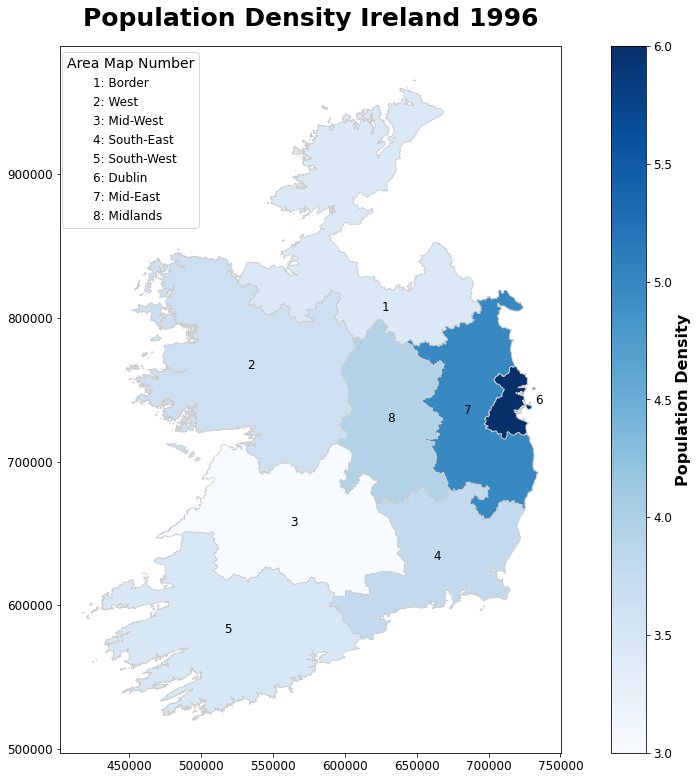

In [61]:
# Source code: https://github.com/beepscore/census_play/blob/master/us_states.ipynb

# Plotting Year 1996
shapefile_path = "..\\Ireland_map\\NUTS3_Boundaries_Gen_50m___2015.shp"
gdf = gpd.read_file(shapefile_path)

# Merging shapefile with map1996
mrg1996 = gdf.set_index('NUTS3NAME').join(map1996.set_index('Area'))

# Converting square meters to square kilometers
mrg1996['SHAPE_Area'] = mrg1996['SHAPE_Area'] / 1000000

# Calculating population density
mrg1996['Pop_Density'] = mrg1996['Population'] / mrg1996['SHAPE_Area']

# Normalizing Population density otherwise, map is blank with Dublin very blue...
mrg1996['Pop_Density_scaled'] = mrg1996['Pop_Density'].apply(lambda x: 1 if x == 0 else np.log(x))

# Plotting the  map
fig, ax = plt.subplots(figsize=(18,13))
mrg1996.plot(column='Pop_Density_scaled', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

# Assigning a legend number to each of the areas
map_numbers = mrg1996.index.tolist()
legend_patches = [mpatches.Patch(label=f"{i + 1}: {map_numbers[i]}") for i in range(len(map_numbers))]
legend_title = 'Area Map Number'
legend = ax.legend(handles=legend_patches, title=legend_title, loc='upper right', bbox_to_anchor=(0.289, 1),
                   handlelength=0, fontsize=12, title_fontsize=14)

# Iterating to assign numbers into the map
for idx, row in mrg1996.iterrows():
    centroid = row['geometry'].centroid
    if idx == 'Dublin':         #Adjusting number 6 Dublin, due to color legend is not visible on default position
        ax.annotate(text=str(map_numbers.index(idx) + 1), xy=(centroid.x, centroid.y), color='black', fontsize=12,
                    ha='center', va='center', xytext=(30, 5), textcoords="offset points")
    elif idx == 'Border':       #Adjusting number 1 Border, by default falls under Nothern Ireland....
        ax.annotate(text=str(map_numbers.index(idx) + 1), xy=(centroid.x, centroid.y), color='black', fontsize=12,
                    ha='center', va='center', xytext=(25, -70), textcoords="offset points")
    elif idx == 'Mid-East':     #Adjusting number 7 Mid-East, very clos to Dublin, I want to avoid confusion.
        ax.annotate(text=str(map_numbers.index(idx) + 1), xy=(centroid.x, centroid.y), color='black', fontsize=12,
                    ha='center', va='center', xytext=(-10, 0), textcoords="offset points")
    else:
        ax.annotate(text=str(map_numbers.index(idx) + 1), xy=(centroid.x, centroid.y), color='black', fontsize=12,
                    ha='center', va='center')
# Color and Title

plt.title('Population Density Ireland 1996', loc="center", pad=20, fontsize=25, fontweight="bold");
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=3, vmax=6))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Population Density',fontsize=16, fontweight="bold")
cbar.ax.tick_params(labelsize=12) 
ax.tick_params(axis='both', which='major', labelsize=12)
plt.show()

In [62]:
mrg1996

,OBJECTID_1,NUTS1,NUTS1NAME,NUTS2,NUTS2NAME,NUTS3,GUID,SHAPE_Leng,SHAPE_Area,geometry,Year,Population,Pop_Density,Pop_Density_scaled
NUTS3NAME,,,,,,,,,,,,,,
Border,1,IE,Ireland,IE04,Northern and Western,IE041,B1A65D7C-1984-4A87-AD58-0E846812C992,2.376811e+06,11510.209483,"MULTIPOLYGON (((647223.812 966808.938, 647226....",1996,352400.0,30.616298,3.421532
West,2,IE,Ireland,IE04,Northern and Western,IE042,A69CA800-8D87-4920-A7C1-50426A1D39B4,2.851487e+06,14280.718711,"MULTIPOLYGON (((497858.799 703047.251, 498064....",1996,546700.0,38.282387,3.644990
Mid-West,3,IE,Ireland,IE05,Southern,IE051,42C5C2A5-2D71-4BD1-BDB5-BD7D3198CD78,8.647434e+05,10507.423875,"MULTIPOLYGON (((468764.092 647302.732, 468611....",1996,205500.0,19.557601,2.973364
South-East,4,IE,Ireland,IE05,Southern,IE052,27C93D4E-AD0E-4B0C-8FA8-3566AEEDA5CC,9.134367e+05,7195.649606,"MULTIPOLYGON (((616432.584 577036.626, 616395....",1996,317000.0,44.054396,3.785425
South-West,5,IE,Ireland,IE05,Southern,IE053,604546A1-A856-4B9B-AD46-E88B27C27155,2.372816e+06,12303.973347,"MULTIPOLYGON (((497699.643 523320.222, 497892....",1996,391500.0,31.818990,3.460063
Dublin,6,IE,Ireland,IE06,Eastern and Midland,IE061,F97E459B-57ED-49C0-8A28-2BC1C7F08E88,3.306883e+05,926.170974,"MULTIPOLYGON (((727936.153 726402.351, 727861....",1996,407300.0,439.767615,6.086246
Mid-East,7,IE,Ireland,IE06,Eastern and Midland,IE062,8E4862CC-7E43-4BF5-A4EF-B2D5ECBA61EF,8.463175e+05,6888.621453,"POLYGON ((708084.443 819557.969, 708154.474 81...",1996,1058300.0,153.630158,5.034548
Midlands,8,IE,Ireland,IE06,Eastern and Midland,IE063,B26C8BAA-F3C5-49A9-B74E-D7FED1823E65,6.234747e+05,6648.679868,"POLYGON ((623194.082 799193.724, 623350.489 79...",1996,347400.0,52.250974,3.956059


In [63]:
# Showing relevant values for 1996:
mrg1996.reset_index(inplace=True)
mrg_1996 = mrg1996[['Year', 'NUTS3NAME', 'SHAPE_Area', 'Population', 'Pop_Density','Pop_Density_scaled']].copy()
mrg_1996.rename(columns={'SHAPE_Area': 'SHAPE_Area_Km2'}, inplace=True)
mrg_1996

,Year,NUTS3NAME,SHAPE_Area_Km2,Population,Pop_Density,Pop_Density_scaled
0,1996,Border,11510.209483,352400.0,30.616298,3.421532
1,1996,West,14280.718711,546700.0,38.282387,3.644990
2,1996,Mid-West,10507.423875,205500.0,19.557601,2.973364
3,1996,South-East,7195.649606,317000.0,44.054396,3.785425
4,1996,South-West,12303.973347,391500.0,31.818990,3.460063
5,1996,Dublin,926.170974,407300.0,439.767615,6.086246
6,1996,Mid-East,6888.621453,1058300.0,153.630158,5.034548
7,1996,Midlands,6648.679868,347400.0,52.250974,3.956059


Population density map for 2017

In [64]:
map2017

,Year,Area,Population
168,2017,Border,528100.0
169,2017,Dublin,1350000.0
170,2017,Mid-East,571100.0
171,2017,Mid-West,387400.0
172,2017,Midlands,297100.0
173,2017,South-East,515300.0
174,2017,South-West,691400.0
175,2017,West,452200.0


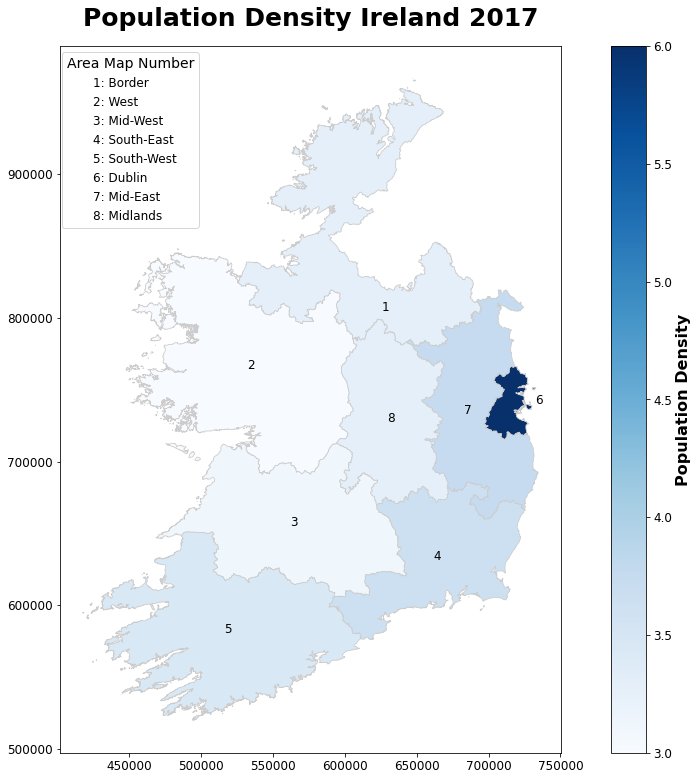

In [65]:
# Source code: https://github.com/beepscore/census_play/blob/master/us_states.ipynb

# Plotting Year 2017
shapefile_path = "..\\Ireland_map\\NUTS3_Boundaries_Gen_50m___2015.shp"
gdf = gpd.read_file(shapefile_path)

# Merging shapefile with map2017
mrg2017 = gdf.set_index('NUTS3NAME').join(map2017.set_index('Area'))

# Converting square meters to square kilometers
mrg2017['SHAPE_Area'] = mrg2017['SHAPE_Area'] / 1000000

# Calculating population density
mrg2017['Pop_Density'] = mrg2017['Population'] / mrg2017['SHAPE_Area']

# Normalizing Population density otherwise, map is blank with Dublin very blue...
mrg2017['Pop_Density_scaled'] = mrg2017['Pop_Density'].apply(lambda x: 1 if x == 0 else np.log(x))

# Plotting the  map
fig, ax = plt.subplots(figsize=(18,13))
mrg2017.plot(column='Pop_Density_scaled', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

# Assigning a legend number to each of the areas
map_numbers = mrg2017.index.tolist()
legend_patches = [mpatches.Patch(label=f"{i + 1}: {map_numbers[i]}") for i in range(len(map_numbers))]
legend_title = 'Area Map Number'
legend = ax.legend(handles=legend_patches, title=legend_title, loc='upper right', bbox_to_anchor=(0.289, 1),
                   handlelength=0, fontsize=12, title_fontsize=14)

# Iterating to assign numbers into the map
for idx, row in mrg2017.iterrows():
    centroid = row['geometry'].centroid
    if idx == 'Dublin':         #Adjusting number 6 Dublin, due to color legend is not visible on default position
        ax.annotate(text=str(map_numbers.index(idx) + 1), xy=(centroid.x, centroid.y), color='black', fontsize=12,
                    ha='center', va='center', xytext=(30, 5), textcoords="offset points")
    elif idx == 'Border':       #Adjusting number 1 Border, by default falls under Nothern Ireland....
        ax.annotate(text=str(map_numbers.index(idx) + 1), xy=(centroid.x, centroid.y), color='black', fontsize=12,
                    ha='center', va='center', xytext=(25, -70), textcoords="offset points")
    elif idx == 'Mid-East':     #Adjusting number 7 Mid-East, very clos to Dublin, I want to avoid confusion.
        ax.annotate(text=str(map_numbers.index(idx) + 1), xy=(centroid.x, centroid.y), color='black', fontsize=12,
                    ha='center', va='center', xytext=(-10, 0), textcoords="offset points")
    else:
        ax.annotate(text=str(map_numbers.index(idx) + 1), xy=(centroid.x, centroid.y), color='black', fontsize=12,
                    ha='center', va='center')
# Color and Title

plt.title('Population Density Ireland 2017', loc="center", pad=20, fontsize=25, fontweight="bold");
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=3, vmax=6))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Population Density',fontsize=16, fontweight="bold")
cbar.ax.tick_params(labelsize=12) 
ax.tick_params(axis='both', which='major', labelsize=12)
plt.show()

In [66]:
# Showing relevant values for 2017:
mrg2017.reset_index(inplace=True)
mrg_2017 = mrg2017[['Year', 'NUTS3NAME', 'SHAPE_Area', 'Population', 'Pop_Density','Pop_Density_scaled']].copy()
mrg_2017.rename(columns={'SHAPE_Area': 'SHAPE_Area_Km2'}, inplace=True)
mrg_2017

,Year,NUTS3NAME,SHAPE_Area_Km2,Population,Pop_Density,Pop_Density_scaled
0,2017,Border,11510.209483,528100.0,45.881007,3.826051
1,2017,West,14280.718711,452200.0,31.665073,3.455214
2,2017,Mid-West,10507.423875,387400.0,36.869170,3.607376
3,2017,South-East,7195.649606,515300.0,71.612714,4.271273
4,2017,South-West,12303.973347,691400.0,56.193230,4.028796
5,2017,Dublin,926.170974,1350000.0,1457.614240,7.284556
6,2017,Mid-East,6888.621453,571100.0,82.904831,4.417693
7,2017,Midlands,6648.679868,297100.0,44.685563,3.799650


Loading csv PEA04.20231004T131011.csv, we need to get 2023 to see how the map looks like.

In [67]:
# Loading the dataset:
df3 = pd.read_csv('..\\Datasets_data.cso.ie\\PEA04.20231004T131011.csv')

In [68]:
df3.head()

,STATISTIC Label,Year,Age Group,Sex,Region,UNIT,VALUE
0,Estimated Population (Persons in April),2011,0 - 4 years,Both sexes,State,Thousand,356.0
1,Estimated Population (Persons in April),2011,0 - 4 years,Both sexes,Border,Thousand,30.7
2,Estimated Population (Persons in April),2011,0 - 4 years,Both sexes,West,Thousand,32.6
3,Estimated Population (Persons in April),2011,0 - 4 years,Both sexes,Mid-West,Thousand,35.0
4,Estimated Population (Persons in April),2011,0 - 4 years,Both sexes,South-East,Thousand,32.0


In [69]:

# Dropping the 'STATISTIC Label' column it's irrelevant for the analysis
df3_col_drop = ['STATISTIC Label','UNIT']
df3.drop(df3_col_drop ,axis=1, inplace=True) 

In [70]:
df3['VALUE'] = df3['VALUE'].apply(lambda x: x * 1000)

In [71]:
# Renaming columns
df3 = df3.rename(columns={'Age Group': 'Age_Group','Region':'Area','VALUE':'Population'})

In [72]:
df3.head()

,Year,Age_Group,Sex,Area,Population
0,2011,0 - 4 years,Both sexes,State,356000.0
1,2011,0 - 4 years,Both sexes,Border,30700.0
2,2011,0 - 4 years,Both sexes,West,32600.0
3,2011,0 - 4 years,Both sexes,Mid-West,35000.0
4,2011,0 - 4 years,Both sexes,South-East,32000.0


In [73]:
df3 = df3[~((df3['Year'] != 2023) |(df3['Sex'] == 'Both sexes') | (df3['Area'] == 'State') | (df3['Age_Group'] == 'All ages'))]

Change Midland to Midland to match with .shp file

In [74]:
df3['Area'] = df3['Area'].str.replace('Midland', 'Midlands')

In [75]:
map2023 = df3.groupby(['Year','Area'])['Population'].sum().reset_index()

In [76]:
map2023

,Year,Area,Population
0,2023,Border,432000.0
1,2023,Dublin,1501300.0
2,2023,Mid-East,777200.0
3,2023,Mid-West,519500.0
4,2023,Midlands,324700.0
5,2023,South-East,468600.0
6,2023,South-West,757200.0
7,2023,West,501000.0


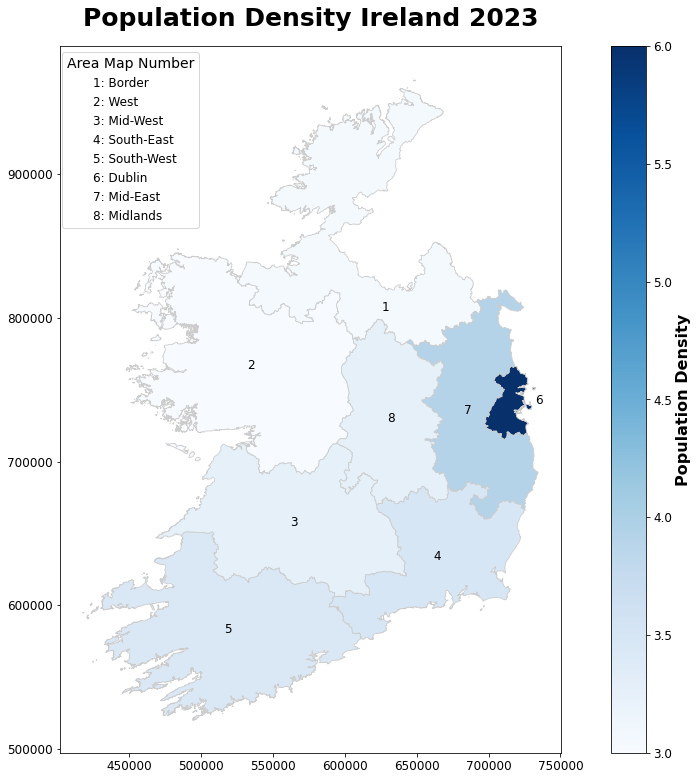

In [77]:
# Source code: https://github.com/beepscore/census_play/blob/master/us_states.ipynb

# Plotting Year 2023
shapefile_path = "..\\Ireland_map\\NUTS3_Boundaries_Gen_50m___2015.shp"
gdf = gpd.read_file(shapefile_path)

# Merging shapefile with map2023
mrg2023 = gdf.set_index('NUTS3NAME').join(map2023.set_index('Area'))

# Converting square meters to square kilometers
mrg2023['SHAPE_Area'] = mrg2023['SHAPE_Area'] / 1000000

# Calculating population density
mrg2023['Pop_Density'] = mrg2023['Population'] / mrg2023['SHAPE_Area']

# Normalizing Population density otherwise, map is blank with Dublin very blue...
mrg2023['Pop_Density_scaled'] = mrg2023['Pop_Density'].apply(lambda x: 1 if x == 0 else np.log(x))

# Plotting the  map
fig, ax = plt.subplots(figsize=(18,13))
mrg2023.plot(column='Pop_Density_scaled', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

# Assigning a legend number to each of the areas
map_numbers = mrg2023.index.tolist()
legend_patches = [mpatches.Patch(label=f"{i + 1}: {map_numbers[i]}") for i in range(len(map_numbers))]
legend_title = 'Area Map Number'
legend = ax.legend(handles=legend_patches, title=legend_title, loc='upper right', bbox_to_anchor=(0.289, 1),
                   handlelength=0, fontsize=12, title_fontsize=14)

# Iterating to assign numbers into the map
for idx, row in mrg2023.iterrows():
    centroid = row['geometry'].centroid
    if idx == 'Dublin':         #Adjusting number 6 Dublin, due to color legend is not visible on default position
        ax.annotate(text=str(map_numbers.index(idx) + 1), xy=(centroid.x, centroid.y), color='black', fontsize=12,
                    ha='center', va='center', xytext=(30, 5), textcoords="offset points")
    elif idx == 'Border':       #Adjusting number 1 Border, by default falls under Nothern Ireland....
        ax.annotate(text=str(map_numbers.index(idx) + 1), xy=(centroid.x, centroid.y), color='black', fontsize=12,
                    ha='center', va='center', xytext=(25, -70), textcoords="offset points")
    elif idx == 'Mid-East':     #Adjusting number 7 Mid-East, very clos to Dublin, I want to avoid confusion.
        ax.annotate(text=str(map_numbers.index(idx) + 1), xy=(centroid.x, centroid.y), color='black', fontsize=12,
                    ha='center', va='center', xytext=(-10, 0), textcoords="offset points")
    else:
        ax.annotate(text=str(map_numbers.index(idx) + 1), xy=(centroid.x, centroid.y), color='black', fontsize=12,
                    ha='center', va='center')
# Color and Title

plt.title('Population Density Ireland 2023', loc="center", pad=20, fontsize=25, fontweight="bold");
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=3, vmax=6))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Population Density',fontsize=16, fontweight="bold")
cbar.ax.tick_params(labelsize=12) 
ax.tick_params(axis='both', which='major', labelsize=12)
plt.show()

In [78]:
# Showing relevant values for 2023:
mrg2023.reset_index(inplace=True)
mrg_2023 = mrg2023[['Year', 'NUTS3NAME', 'SHAPE_Area', 'Population', 'Pop_Density','Pop_Density_scaled']].copy()
mrg_2023.rename(columns={'SHAPE_Area': 'SHAPE_Area_Km2'}, inplace=True)
mrg_2023

,Year,NUTS3NAME,SHAPE_Area_Km2,Population,Pop_Density,Pop_Density_scaled
0,2023,Border,11510.209483,432000.0,37.531897,3.625191
1,2023,West,14280.718711,501000.0,35.082268,3.557696
2,2023,Mid-West,10507.423875,519500.0,49.441234,3.900785
3,2023,South-East,7195.649606,468600.0,65.122682,4.176273
4,2023,South-West,12303.973347,757200.0,61.541096,4.119705
5,2023,Dublin,926.170974,1501300.0,1620.975006,7.390783
6,2023,Mid-East,6888.621453,777200.0,112.823735,4.725827
7,2023,Midlands,6648.679868,324700.0,48.836763,3.888483


In [79]:
# Summarising/merging all relevant info for the maps
map_summary = pd.concat([mrg_1996,mrg_2023], ignore_index=True) 
map_summary = map_summary.rename(columns={'NUTS3NAME': 'Area'}) # Renaming NUTS3NAME to area
map_summary

,Year,Area,SHAPE_Area_Km2,Population,Pop_Density,Pop_Density_scaled
0,1996,Border,11510.209483,352400.0,30.616298,3.421532
1,1996,West,14280.718711,546700.0,38.282387,3.644990
2,1996,Mid-West,10507.423875,205500.0,19.557601,2.973364
3,1996,South-East,7195.649606,317000.0,44.054396,3.785425
4,1996,South-West,12303.973347,391500.0,31.818990,3.460063
5,1996,Dublin,926.170974,407300.0,439.767615,6.086246
6,1996,Mid-East,6888.621453,1058300.0,153.630158,5.034548
7,1996,Midlands,6648.679868,347400.0,52.250974,3.956059
8,2023,Border,11510.209483,432000.0,37.531897,3.625191
9,2023,West,14280.718711,501000.0,35.082268,3.557696


In [80]:
mapsummary = map_summary.pivot_table(index=['Year'],columns='Area', values=['Pop_Density'], aggfunc='sum').reset_index()

In [81]:
mapsummary

Year Pop_Density                                                 \
Area            Border       Dublin    Mid-East   Mid-West   Midlands   
0     1996   30.616298   439.767615  153.630158  19.557601  52.250974   
1     2023   37.531897  1620.975006  112.823735  49.441234  48.836763   

                                       
Area South-East South-West       West  
0     44.054396  31.818990  38.282387  
1     65.122682  61.541096  35.082268

# Area breakdown:

1. **Border**: Cavan, Donegal, Leitrim, Monaghan, Sligo.

2. **Midland**: Laois, Longford, Offaly, Westmeath.

3. **West**: Galway, Mayo, Roscommon.

4. **Dublin**: Dublin City, Dún Laoghaire-Rathdown, Fingal, South Dublin.

5. **Mid-East**: Kildare, Louth, Meath, Wicklow.

6. **Mid-West**: Clare, Limerick, Tipperary.

7. **South-East**: Carlow, Kilkenny, Waterford, Wexford.

8. **South-West**: Cork, Kerry.

Source: https://www.cso.ie/en/methods/informationnotefordatausersrevisiontotheirishnuts2andnuts3regions/


# Migration Analysis

## EDA

In [82]:
# Loading the dataset:
df4 = pd.read_csv('https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/PEA03/CSV/1.0/en')

In [83]:
# Displaying first 5 rows:
df4.head()

,STATISTIC,STATISTIC Label,TLIST(A1),Year,C02076V03371,Age Group,C02199V02655,Sex,C02542V03077,Inward or Outward Flow,UNIT,VALUE
0,PEA03,Estimated Migration (Persons in April),1987,1987,-,All ages,-,Both sexes,1,Net migration,Thousand,-23.0
1,PEA03,Estimated Migration (Persons in April),1987,1987,-,All ages,-,Both sexes,4,Emigrants: All destinations,Thousand,40.2
2,PEA03,Estimated Migration (Persons in April),1987,1987,-,All ages,-,Both sexes,5,Immigrants: All origins,Thousand,17.2
3,PEA03,Estimated Migration (Persons in April),1987,1987,-,All ages,1,Male,1,Net migration,Thousand,NaN
4,PEA03,Estimated Migration (Persons in April),1987,1987,-,All ages,1,Male,4,Emigrants: All destinations,Thousand,NaN


In [84]:
# Getting df info, we can see we are getting null values for Value:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1998 entries, 0 to 1997
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   STATISTIC               1998 non-null   object 
 1   STATISTIC Label         1998 non-null   object 
 2   TLIST(A1)               1998 non-null   int64  
 3   Year                    1998 non-null   int64  
 4   C02076V03371            1998 non-null   object 
 5   Age Group               1998 non-null   object 
 6   C02199V02655            1998 non-null   object 
 7   Sex                     1998 non-null   object 
 8   C02542V03077            1998 non-null   int64  
 9   Inward or Outward Flow  1998 non-null   object 
 10  UNIT                    1998 non-null   object 
 11  VALUE                   1683 non-null   float64
dtypes: float64(1), int64(3), object(8)
memory usage: 187.4+ KB


Let's drop irrelevant columns:

In [85]:
df4_col_drop = ['STATISTIC','STATISTIC Label','TLIST(A1)','C02076V03371','C02199V02655','C02542V03077','UNIT']
df4.drop(df4_col_drop ,axis=1, inplace=True) 

Column renaming:

In [86]:
# Renaming the columns
df4 = df4.rename(columns={'Age Group': 'Age_Group','Inward or Outward Flow':'Inward_or_Outward_Flow'})


Converting Population to a thousands:

In [87]:
df4['VALUE'] = df4['VALUE'].apply(lambda x: x * 1000)

We've got missing values, let's find out which categories are affected:

In [88]:
df4_NaN = df4[df4.isnull().any(axis=1)]
print("Rows with null values:")
df4_NaN.head(10)

Rows with null values:


,Year,Age_Group,Sex,Inward_or_Outward_Flow,VALUE
3,1987,All ages,Male,Net migration,NaN
4,1987,All ages,Male,Emigrants: All destinations,NaN
5,1987,All ages,Male,Immigrants: All origins,NaN
6,1987,All ages,Female,Net migration,NaN
7,1987,All ages,Female,Emigrants: All destinations,NaN
8,1987,All ages,Female,Immigrants: All origins,NaN
9,1987,0 - 14 years,Both sexes,Net migration,NaN
12,1987,0 - 14 years,Male,Net migration,NaN
15,1987,0 - 14 years,Female,Net migration,NaN
18,1987,15 - 24 years,Both sexes,Net migration,NaN


In [89]:
#Function to count the NaN values per category:
def df4_NaN_Count(df4_NaN):
    for column in df4_NaN:
        counts = df4_NaN[column].value_counts()
        print(f"Occurrences for {column}:")
        print(counts)
        print("\n")


# Call the function with your DataFrame as an argument
df4_NaN_Count(df4_NaN)

Occurrences for Year:
1987    21
1988    21
1989    21
1990    21
1991    21
1992    21
1993    21
1994    21
1995    21
1996    21
1997    21
1998    21
1999    21
2000    21
2001    21
Name: Year, dtype: int64


Occurrences for Age_Group:
All ages             90
0 - 14 years         45
15 - 24 years        45
25 - 44 years        45
45 - 64 years        45
65 years and over    45
Name: Age_Group, dtype: int64


Occurrences for Sex:
Male          120
Female        120
Both sexes     75
Name: Sex, dtype: int64


Occurrences for Inward_or_Outward_Flow:
Net migration                  255
Emigrants: All destinations     30
Immigrants: All origins         30
Name: Inward_or_Outward_Flow, dtype: int64


Occurrences for VALUE:
Series([], Name: VALUE, dtype: int64)




If we combine Age Group "All Ages" and Sex "Both sexes" we can see that there are no NaN values:

In [90]:
df4 = df4[~((df4['Sex'] != 'Both sexes')  | (df4['Age_Group'] != 'All ages'))]
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111 entries, 0 to 1946
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    111 non-null    int64  
 1   Age_Group               111 non-null    object 
 2   Sex                     111 non-null    object 
 3   Inward_or_Outward_Flow  111 non-null    object 
 4   VALUE                   111 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 5.2+ KB


In [91]:
df4

,Year,Age_Group,Sex,Inward_or_Outward_Flow,VALUE
0,1987,All ages,Both sexes,Net migration,-23000.0
1,1987,All ages,Both sexes,Emigrants: All destinations,40200.0
2,1987,All ages,Both sexes,Immigrants: All origins,17200.0
54,1988,All ages,Both sexes,Net migration,-41900.0
55,1988,All ages,Both sexes,Emigrants: All destinations,61100.0
...,...,...,...,...,...
1891,2022,All ages,Both sexes,Emigrants: All destinations,56100.0
1892,2022,All ages,Both sexes,Immigrants: All origins,107800.0
1944,2023,All ages,Both sexes,Net migration,77700.0
1945,2023,All ages,Both sexes,Emigrants: All destinations,64000.0


Using a Pivot to group all values.

In [92]:
pivot_df4 = df4.pivot_table(index=['Year'],columns='Inward_or_Outward_Flow', values='VALUE', aggfunc='sum').reset_index()

In [93]:
pivot_df4

Inward_or_Outward_Flow,Year,Emigrants: All destinations,Immigrants: All origins,Net migration
0,1987,40200.0,17200.0,-23000.0
1,1988,61100.0,19200.0,-41900.0
2,1989,70600.0,26700.0,-43900.0
3,1990,56300.0,33300.0,-22900.0
4,1991,35300.0,33300.0,-2000.0
5,1992,33400.0,40700.0,7400.0
6,1993,35100.0,34700.0,-400.0
7,1994,34800.0,30100.0,-4700.0
8,1995,33100.0,31200.0,-1900.0
9,1996,31200.0,39200.0,8000.0


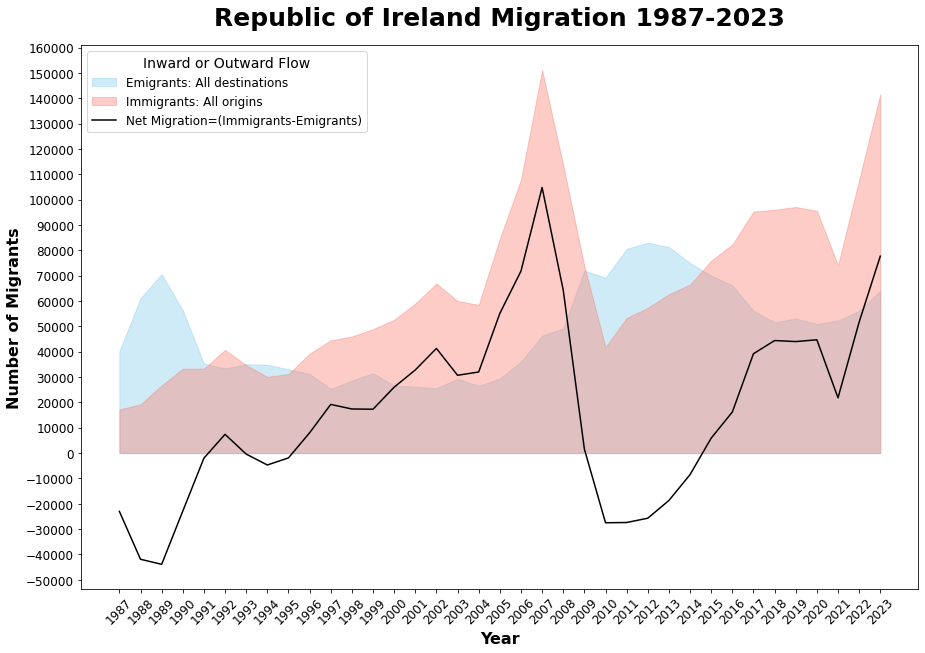

In [94]:
plt.figure(figsize=(15, 10))
plt.fill_between(pivot_df4['Year'], pivot_df4['Emigrants: All destinations'], color='skyblue', alpha=0.4, label='Emigrants: All destinations')
plt.fill_between(pivot_df4['Year'], pivot_df4['Immigrants: All origins'], color='salmon', alpha=0.4, label='Immigrants: All origins')
plt.plot(pivot_df4['Year'], pivot_df4['Net migration'], color='black', label='Net Migration=(Immigrants-Emigrants)')

# Labels
plt.title('Republic of Ireland Migration 1987-2023', loc="center", pad=20, fontsize=25, fontweight="bold")
plt.xlabel('Year', fontsize=16, fontweight="bold")
plt.ylabel('Number of Migrants', fontsize=16, fontweight="bold")
plt.yticks(range(-50000, 150000+20000, 10000),fontsize=12) # Range to display more info
plt.xticks(pivot_df4['Year'],rotation=45,fontsize=12)      # Displaying all years
plt.legend(loc="upper left", fontsize=12,title='Inward or Outward Flow',title_fontsize=14)
plt.show()


# Studying migration destination/origin

## EDA

In [95]:
# Loading the dataset:
df5 = pd.read_csv('https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/PEA18/CSV/1.0/en')

In [96]:
# Displaying first 5 rows:
df5.head()


,STATISTIC,STATISTIC Label,TLIST(A1),Year,C02719V03286,Country,C02199V02655,Sex,C02542V03077,Origin or Destination,UNIT,VALUE
0,PEA18,Estimated Migration (Persons in April),1987,1987,GB1,United Kingdom (1),-,Both sexes,1,Net migration,Thousand,-13.7
1,PEA18,Estimated Migration (Persons in April),1987,1987,GB1,United Kingdom (1),-,Both sexes,4,Emigrants: All destinations,Thousand,21.8
2,PEA18,Estimated Migration (Persons in April),1987,1987,GB1,United Kingdom (1),-,Both sexes,5,Immigrants: All origins,Thousand,8.1
3,PEA18,Estimated Migration (Persons in April),1987,1987,GB1,United Kingdom (1),1,Male,1,Net migration,Thousand,-9.0
4,PEA18,Estimated Migration (Persons in April),1987,1987,GB1,United Kingdom (1),1,Male,4,Emigrants: All destinations,Thousand,13.1


In [97]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2664 entries, 0 to 2663
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   STATISTIC              2664 non-null   object 
 1   STATISTIC Label        2664 non-null   object 
 2   TLIST(A1)              2664 non-null   int64  
 3   Year                   2664 non-null   int64  
 4   C02719V03286           2664 non-null   object 
 5   Country                2664 non-null   object 
 6   C02199V02655           2664 non-null   object 
 7   Sex                    2664 non-null   object 
 8   C02542V03077           2664 non-null   int64  
 9   Origin or Destination  2664 non-null   object 
 10  UNIT                   2664 non-null   object 
 11  VALUE                  2104 non-null   float64
dtypes: float64(1), int64(3), object(8)
memory usage: 249.9+ KB


Let's drop irrelevant columns:

In [98]:
df5_col_drop = ['STATISTIC','STATISTIC Label','TLIST(A1)','C02719V03286','C02199V02655','C02542V03077','UNIT']
df5.drop(df5_col_drop ,axis=1, inplace=True) 

Column renaming:

In [99]:
df5 = df5.rename(columns={'Origin or Destination': 'Origin_or_Destination'})


Converting Value to a thousands:

In [100]:
df5['VALUE'] = df5['VALUE'].apply(lambda x: x * 1000)

In [101]:
df5

,Year,Country,Sex,Origin_or_Destination,VALUE
0,1987,United Kingdom (1),Both sexes,Net migration,-13700.0
1,1987,United Kingdom (1),Both sexes,Emigrants: All destinations,21800.0
2,1987,United Kingdom (1),Both sexes,Immigrants: All origins,8100.0
3,1987,United Kingdom (1),Male,Net migration,-9000.0
4,1987,United Kingdom (1),Male,Emigrants: All destinations,13100.0
...,...,...,...,...,...
2659,2023,EU15 to EU27 (accession countries joined post ...,Male,Emigrants: All destinations,3600.0
2660,2023,EU15 to EU27 (accession countries joined post ...,Male,Immigrants: All origins,3900.0
2661,2023,EU15 to EU27 (accession countries joined post ...,Female,Net migration,-200.0
2662,2023,EU15 to EU27 (accession countries joined post ...,Female,Emigrants: All destinations,5200.0


In [102]:
df5 = df5[~((df5['Sex'] != 'Both sexes')  | (df5['Origin_or_Destination'] == 'Net migration')
            | (df5['Country'] == 'All countries'))]
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 518 entries, 1 to 2657
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   518 non-null    int64  
 1   Country                518 non-null    object 
 2   Sex                    518 non-null    object 
 3   Origin_or_Destination  518 non-null    object 
 4   VALUE                  398 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 24.3+ KB


In [103]:
df5

,Year,Country,Sex,Origin_or_Destination,VALUE
1,1987,United Kingdom (1),Both sexes,Emigrants: All destinations,21800.0
2,1987,United Kingdom (1),Both sexes,Immigrants: All origins,8100.0
10,1987,United States,Both sexes,Emigrants: All destinations,9900.0
11,1987,United States,Both sexes,Immigrants: All origins,3000.0
19,1987,Canada,Both sexes,Emigrants: All destinations,NaN
...,...,...,...,...,...
2630,2023,Other countries (23),Both sexes,Immigrants: All origins,75800.0
2647,2023,EU14 excl Irl (UK & Ireland),Both sexes,Emigrants: All destinations,13900.0
2648,2023,EU14 excl Irl (UK & Ireland),Both sexes,Immigrants: All origins,17700.0
2656,2023,EU15 to EU27 (accession countries joined post ...,Both sexes,Emigrants: All destinations,8800.0


In [104]:
df5['Country'] = df5['Country'].str.replace('EU15 to EU27 \(accession countries joined post 2004\)', 'EU15 to EU27 (membership after 2004)', regex=True)


In [105]:
df5e = df5[(df5['Origin_or_Destination'] == 'Emigrants: All destinations')]
df5i = df5[(df5['Origin_or_Destination'] == 'Immigrants: All origins')]

In [106]:
df5i 

,Year,Country,Sex,Origin_or_Destination,VALUE
2,1987,United Kingdom (1),Both sexes,Immigrants: All origins,8100.0
11,1987,United States,Both sexes,Immigrants: All origins,3000.0
20,1987,Canada,Both sexes,Immigrants: All origins,NaN
29,1987,Australia,Both sexes,Immigrants: All origins,NaN
38,1987,Other countries (23),Both sexes,Immigrants: All origins,4000.0
...,...,...,...,...,...
2612,2023,Canada,Both sexes,Immigrants: All origins,7200.0
2621,2023,Australia,Both sexes,Immigrants: All origins,7700.0
2630,2023,Other countries (23),Both sexes,Immigrants: All origins,75800.0
2648,2023,EU14 excl Irl (UK & Ireland),Both sexes,Immigrants: All origins,17700.0


In [107]:
pivot_df5e = df5e.pivot_table(index=['Year'],columns='Country', values='VALUE', aggfunc='sum').reset_index()
pivot_df5e.set_index('Year', inplace=True)
pivot_df5e.head()

Country,Australia,Canada,EU14 excl Irl (UK & Ireland),EU15 to EU27 (membership after 2004),Other countries (23),United Kingdom (1),United States
Year,,,,,,,
1987,0.0,0.0,3100.0,0.0,5400.0,21800.0,9900.0
1988,0.0,0.0,2800.0,0.0,10200.0,40200.0,7900.0
1989,0.0,0.0,3900.0,0.0,10000.0,48400.0,8200.0
1990,0.0,0.0,5100.0,0.0,7600.0,35800.0,7700.0
1991,0.0,0.0,3100.0,0.0,4400.0,23000.0,4800.0


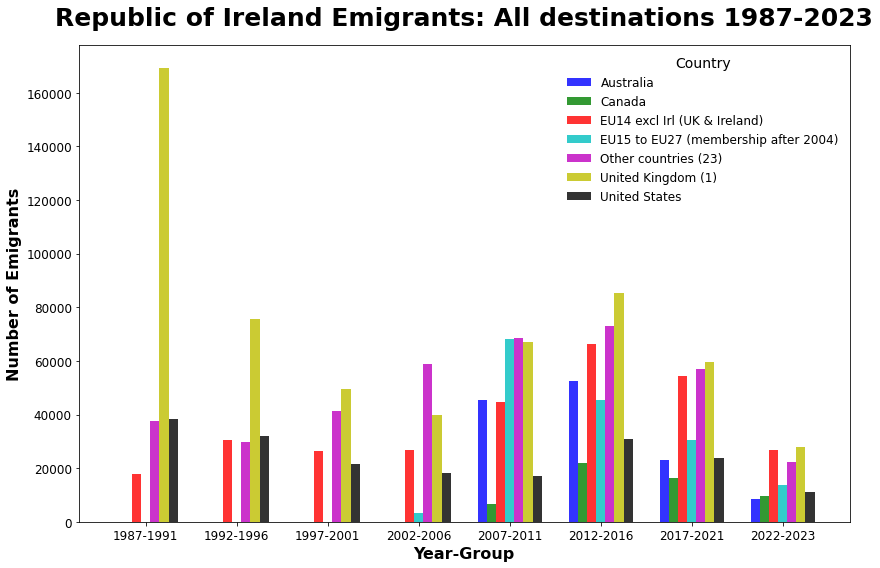

In [108]:
# Clustering every 5 years
df5j = pivot_df5e.groupby(np.arange(len(pivot_df5e)) // 5).sum();


fig, ax = plt.subplots(figsize=(12, 8))
index = np.arange(len(df5j)) # Creating an index to iterate over

bar_width = 0.1
opacity = 0.8
num_countries = len(df5j.columns) # Getting the count of countries 7
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

for i, col in enumerate(df5j.columns): # Creating the artists
    rects = ax.bar(index + i * bar_width, df5j[col], bar_width, alpha=opacity, color=colors[i % len(colors)], label=col);

ax.set_xlabel('Year-Group', fontsize=16, fontweight="bold")
ax.set_ylabel('Number of Emigrants', fontsize=16, fontweight="bold")
ax.set_title('Republic of Ireland Emigrants: All destinations 1987-2023', loc="center", pad=20, fontsize=25, fontweight="bold")
ax.set_xticks(index + bar_width * (num_countries - 1) / 2)
plt.yticks(fontsize=12)
ax.set_xticklabels([f'{pivot_df5e.index[5*i]}-{pivot_df5e.index[min(5*(i+1)-1, len(pivot_df5e)-1)]}' for i in range(len(df5j))],fontsize=12)
ax.legend(loc="best", fontsize=12,title='Country',title_fontsize=14,facecolor='white', framealpha=0)

plt.tight_layout()
plt.show()


In [109]:
df5j

Country,Australia,Canada,EU14 excl Irl (UK & Ireland),EU15 to EU27 (membership after 2004),Other countries (23),United Kingdom (1),United States
0,0.0,0.0,18000.0,0.0,37600.0,169200.0,38500.0
1,0.0,0.0,30500.0,0.0,29600.0,75500.0,32100.0
2,0.0,0.0,26300.0,0.0,41200.0,49600.0,21400.0
3,0.0,0.0,26900.0,3100.0,58900.0,39800.0,18100.0
4,45300.0,6700.0,44500.0,68000.0,68400.0,67200.0,17200.0
5,52500.0,22000.0,66200.0,45400.0,73000.0,85500.0,31000.0
6,23100.0,16300.0,54400.0,30400.0,56800.0,59500.0,23700.0
7,8600.0,9500.0,26700.0,13800.0,22400.0,28000.0,11200.0


In [110]:
pivot_df5i = df5i.pivot_table(index=['Year'],columns='Country', values='VALUE', aggfunc='sum').reset_index()
pivot_df5i.set_index('Year', inplace=True)
pivot_df5i.head()

Country,Australia,Canada,EU14 excl Irl (UK & Ireland),EU15 to EU27 (membership after 2004),Other countries (23),United Kingdom (1),United States
Year,,,,,,,
1987,0.0,0.0,2200.0,0.0,4000.0,8100.0,3000.0
1988,0.0,0.0,2600.0,0.0,3400.0,9900.0,3400.0
1989,0.0,0.0,3600.0,0.0,5800.0,14200.0,3100.0
1990,0.0,0.0,5000.0,0.0,6900.0,17600.0,3900.0
1991,0.0,0.0,4200.0,0.0,6100.0,18700.0,4300.0


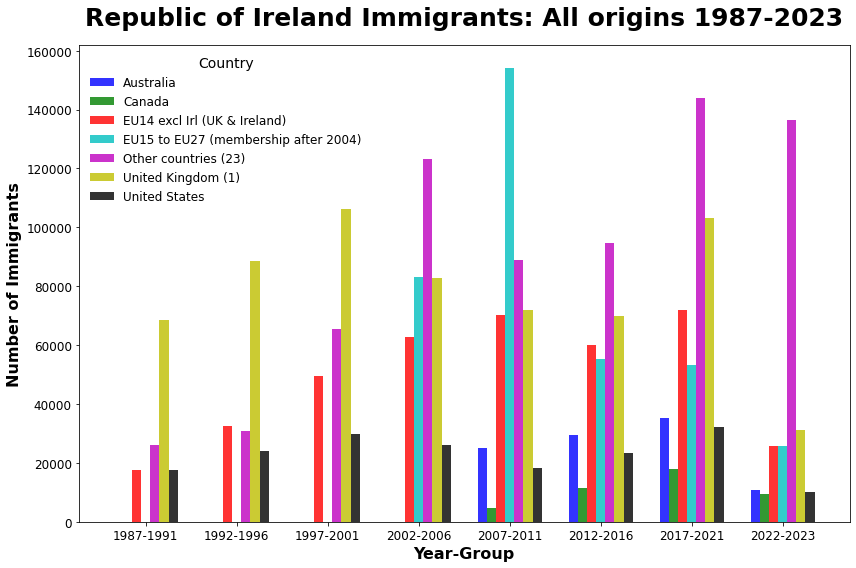

In [111]:
# Clustering every 5 years
df5h = pivot_df5i.groupby(np.arange(len(pivot_df5i)) // 5).sum();


fig, ax = plt.subplots(figsize=(12, 8))
index = np.arange(len(df5h)) # Creating an index to iterate over

bar_width = 0.1
opacity = 0.8
num_countries = len(df5h.columns) # Getting the count of countries 7
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

for i, col in enumerate(df5h.columns): # Creating the artists
    rects = ax.bar(index + i * bar_width, df5h[col], bar_width, alpha=opacity, color=colors[i % len(colors)], label=col);

ax.set_xlabel('Year-Group', fontsize=16, fontweight="bold")
ax.set_ylabel('Number of Immigrants', fontsize=16, fontweight="bold")
ax.set_title('Republic of Ireland Immigrants: All origins 1987-2023', loc="center", pad=20, fontsize=25, fontweight="bold")
ax.set_xticks(index + bar_width * (num_countries - 1) / 2)
plt.yticks(fontsize=12)
ax.set_xticklabels([f'{pivot_df5i.index[5*i]}-{pivot_df5i.index[min(5*(i+1)-1, len(pivot_df5i)-1)]}' for i in range(len(df5h))],fontsize=12)
ax.legend(loc="best", fontsize=12,title='Country',title_fontsize=14,facecolor='white', framealpha=0)

plt.tight_layout()
plt.show()


In [112]:
df5h

Country,Australia,Canada,EU14 excl Irl (UK & Ireland),EU15 to EU27 (membership after 2004),Other countries (23),United Kingdom (1),United States
0,0.0,0.0,17600.0,0.0,26200.0,68500.0,17700.0
1,0.0,0.0,32400.0,0.0,30900.0,88600.0,24100.0
2,0.0,0.0,49400.0,0.0,65600.0,106100.0,29900.0
3,0.0,0.0,62900.0,83000.0,123100.0,82800.0,26000.0
4,25200.0,4800.0,70400.0,154100.0,88800.0,72000.0,18300.0
5,29500.0,11600.0,60100.0,55400.0,94800.0,69900.0,23400.0
6,35400.0,18000.0,72000.0,53300.0,143900.0,103300.0,32100.0
7,10800.0,9400.0,25800.0,25700.0,136300.0,31200.0,10200.0


# Notes:

1. **EU14 excl Irl (UK & Ireland):** Austria, Belgium, Denmark, Finland, France, Germany, Greece, Italy, Luxembourg, the Netherlands, Portugal, Spain and Sweden.
2. **EU15 to EU27 (membership after 2004):** Bulgaria, Czech Republic, Estonia, Croatia, Cyprus, Latvia, Lithuania, Hungary, Malta, Poland, Romania, Slovenia and Slovakia.
3. **Other countries (23):** Rest of the world.





# Migration by Education Level

In [113]:
# Loading the dataset:
df6 = pd.read_csv('https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/PEA19/CSV/1.0/en')

In [114]:
df6.head()

,STATISTIC,STATISTIC Label,TLIST(A1),Year,C02199V02655,Sex,C02757V03327,Education Level,C02542V03077,Inward or Outward Flow,UNIT,VALUE
0,PEA19,Estimated Migration Aged 15 Years and Over (P...,2009,2009,-,Both sexes,45,Higher secondary and below,1,Net migration,Thousand,-9.7
1,PEA19,Estimated Migration Aged 15 Years and Over (P...,2009,2009,-,Both sexes,45,Higher secondary and below,4,Emigrants: All destinations,Thousand,31.6
2,PEA19,Estimated Migration Aged 15 Years and Over (P...,2009,2009,-,Both sexes,45,Higher secondary and below,5,Immigrants: All origins,Thousand,21.9
3,PEA19,Estimated Migration Aged 15 Years and Over (P...,2009,2009,-,Both sexes,65,Post leaving cert,1,Net migration,Thousand,-0.2
4,PEA19,Estimated Migration Aged 15 Years and Over (P...,2009,2009,-,Both sexes,65,Post leaving cert,4,Emigrants: All destinations,Thousand,6.7


Let's drop irrelevant columns:

In [115]:
df6_col_drop = ['STATISTIC','STATISTIC Label','TLIST(A1)','C02757V03327','C02199V02655','C02542V03077','UNIT']
df6.drop(df6_col_drop ,axis=1, inplace=True)

In [116]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    630 non-null    int64  
 1   Sex                     630 non-null    object 
 2   Education Level         630 non-null    object 
 3   Inward or Outward Flow  630 non-null    object 
 4   VALUE                   630 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 24.7+ KB


Column renaming:

In [117]:
df6 = df6.rename(columns={'Education Level': 'Education_Level','Inward or Outward Flow': 'Inward_or_Outward_Flow'})

Converting Value to a thousands:


In [118]:
df6['VALUE'] = df6['VALUE'].apply(lambda x: x * 1000)

In [119]:
df6

,Year,Sex,Education_Level,Inward_or_Outward_Flow,VALUE
0,2009,Both sexes,Higher secondary and below,Net migration,-9700.0
1,2009,Both sexes,Higher secondary and below,Emigrants: All destinations,31600.0
2,2009,Both sexes,Higher secondary and below,Immigrants: All origins,21900.0
3,2009,Both sexes,Post leaving cert,Net migration,-200.0
4,2009,Both sexes,Post leaving cert,Emigrants: All destinations,6700.0
...,...,...,...,...,...
625,2022,Female,Not stated,Emigrants: All destinations,1300.0
626,2022,Female,Not stated,Immigrants: All origins,3900.0
627,2022,Female,All persons,Net migration,32700.0
628,2022,Female,All persons,Emigrants: All destinations,22600.0


Breaking down df6 into df6a & df6b, first for Emigrants: All destinations and second for Immigrants: All origins. Let's find out which level of education emigrants/immigrants hold.

In [120]:
df6a= df6[(df6['Sex'] == 'Both sexes')  & (df6['Inward_or_Outward_Flow'] == 'Emigrants: All destinations') &
           (df6['Education_Level'] != 'All persons')]
            
            
df6a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 1 to 595
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    56 non-null     int64  
 1   Sex                     56 non-null     object 
 2   Education_Level         56 non-null     object 
 3   Inward_or_Outward_Flow  56 non-null     object 
 4   VALUE                   56 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 2.6+ KB


In [121]:
df6b = df6[(df6['Sex'] == 'Both sexes')  & (df6['Inward_or_Outward_Flow'] == 'Immigrants: All origins') &
           (df6['Education_Level'] != 'All persons')]
            
df6b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 2 to 596
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    56 non-null     int64  
 1   Sex                     56 non-null     object 
 2   Education_Level         56 non-null     object 
 3   Inward_or_Outward_Flow  56 non-null     object 
 4   VALUE                   56 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 2.6+ KB


Creating pivots to plot bar charts according to Education Level

In [122]:
pivot_df6a = df6a.pivot_table(index=['Year'],columns='Education_Level', values='VALUE', aggfunc='sum').reset_index()
pivot_df6a.reset_index(inplace=True,drop=True)

In [123]:
pivot_df6a

Education_Level,Year,Higher secondary and below,Not stated,Post leaving cert,Third level
0,2009,31600.0,7000.0,6700.0,24400.0
1,2010,26700.0,5400.0,7100.0,27900.0
2,2011,30100.0,3300.0,6200.0,35800.0
3,2012,28200.0,4300.0,6000.0,34900.0
4,2013,32200.0,2500.0,5700.0,29900.0
5,2014,23500.0,5700.0,5400.0,30100.0
6,2015,20100.0,4200.0,3300.0,31000.0
7,2016,20000.0,6800.0,3600.0,25500.0
8,2017,20200.0,6100.0,2400.0,27900.0
9,2018,12800.0,6600.0,4000.0,26500.0


In [124]:
pivot_df6a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        14 non-null     int64  
 1   Higher secondary and below  14 non-null     float64
 2   Not stated                  14 non-null     float64
 3   Post leaving cert           14 non-null     float64
 4   Third level                 14 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 688.0 bytes


In [125]:
pivot_df6ab = pivot_df6a.drop(columns=['Year'])

In [126]:
pivot_df6ab

Education_Level,Higher secondary and below,Not stated,Post leaving cert,Third level
0,31600.0,7000.0,6700.0,24400.0
1,26700.0,5400.0,7100.0,27900.0
2,30100.0,3300.0,6200.0,35800.0
3,28200.0,4300.0,6000.0,34900.0
4,32200.0,2500.0,5700.0,29900.0
5,23500.0,5700.0,5400.0,30100.0
6,20100.0,4200.0,3300.0,31000.0
7,20000.0,6800.0,3600.0,25500.0
8,20200.0,6100.0,2400.0,27900.0
9,12800.0,6600.0,4000.0,26500.0


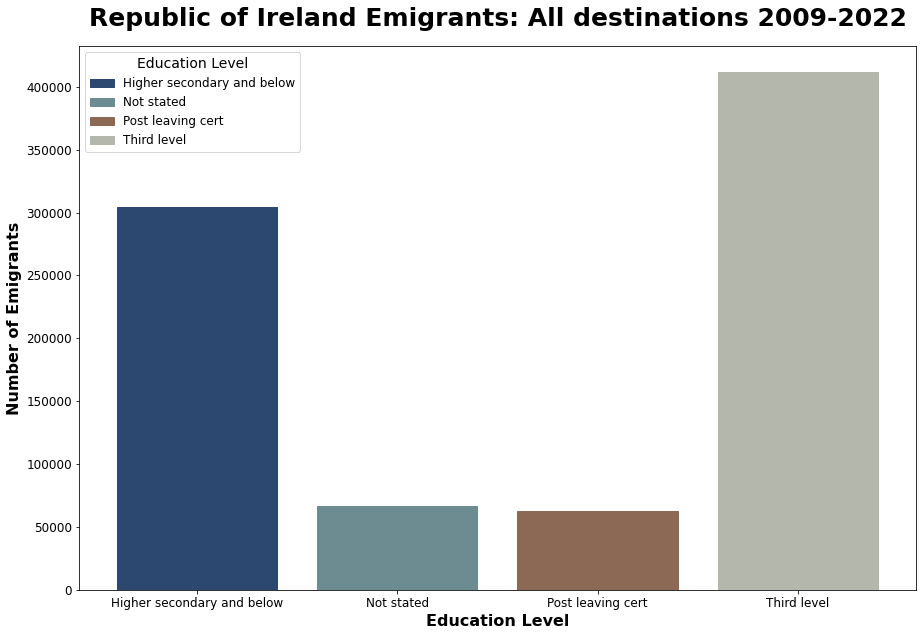

In [127]:
# summing up
pivot_df6absum = pivot_df6ab.sum()

categories = ['Higher secondary and below', 'Not stated', 'Post leaving cert', 'Third level']
values_df6absum = pivot_df6absum.values

# friendly colors
coloringab = ['#2C4870', '#6D8C91', '#8C6954', '#B4B7AB']

fig, ax = plt.subplots(figsize=(15, 10))
bars = ax.bar(categories, values_df6absum)

ax.set_xlabel('Education Level', fontsize=16, fontweight="bold")
ax.set_ylabel('Number of Emigrants', fontsize=16, fontweight="bold")
ax.set_title('Republic of Ireland Emigrants: All destinations 2009-2022', loc="center", pad=20, fontsize=25, fontweight="bold")
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

# formating legend
for bar, color in zip(bars, coloringab):
    bar.set_color(color)
ax.legend(bars, categories,fontsize=12,title='Education Level',title_fontsize=14)

plt.show()

In [128]:
pivot_df6absum

Education_Level
Higher secondary and below    304100.0
Not stated                     66500.0
Post leaving cert              62400.0
Third level                   411700.0
dtype: float64

In [129]:
pivot_df6b = df6b.pivot_table(index=['Year'],columns='Education_Level', values='VALUE', aggfunc='sum').reset_index()
pivot_df6b.reset_index(inplace=True,drop=True)

In [130]:
pivot_df6bb = pivot_df6b.drop(columns=['Year'])

In [131]:
pivot_df6bb

Education_Level,Higher secondary and below,Not stated,Post leaving cert,Third level
0,21900.0,8300.0,6500.0,32500.0
1,15100.0,2900.0,2500.0,19500.0
2,17300.0,2100.0,5300.0,22400.0
3,16100.0,2700.0,3700.0,28200.0
4,17200.0,3400.0,2400.0,32000.0
5,15100.0,5800.0,3900.0,35100.0
6,17700.0,8600.0,2700.0,37200.0
7,18000.0,3400.0,8700.0,42400.0
8,16800.0,6800.0,3700.0,48600.0
9,18400.0,3400.0,8800.0,49200.0


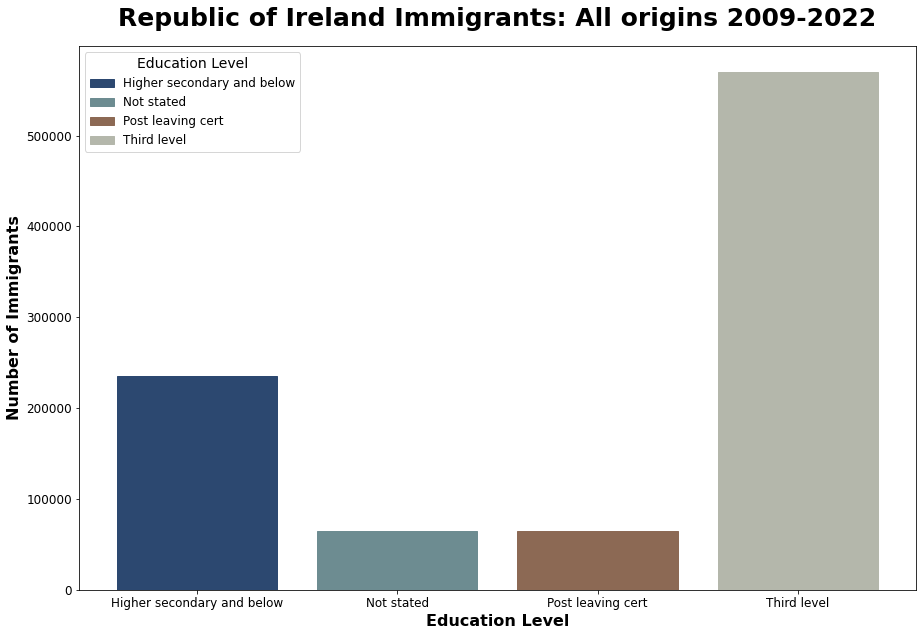

In [132]:
# summing up
pivot_df6bbsum = pivot_df6bb.sum()

categories = ['Higher secondary and below', 'Not stated', 'Post leaving cert', 'Third level']
values_df6bbsum = pivot_df6bbsum.values

# friendly colors
coloringbb = ['#2C4870', '#6D8C91', '#8C6954', '#B4B7AB']

fig, ax = plt.subplots(figsize=(15, 10))
bars = ax.bar(categories, values_df6bbsum)

ax.set_xlabel('Education Level', fontsize=16, fontweight="bold")
ax.set_ylabel('Number of Immigrants', fontsize=16, fontweight="bold")
ax.set_title('Republic of Ireland Immigrants: All origins 2009-2022', loc="center", pad=20, fontsize=25, fontweight="bold")
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

# formating legend
for bar, color in zip(bars, coloringbb):
    bar.set_color(color)
ax.legend(bars, categories,fontsize=12,title='Education Level',title_fontsize=14)

plt.show()

In [133]:
pivot_df6bbsum

Education_Level
Higher secondary and below    235700.0
Not stated                     64300.0
Post leaving cert              65100.0
Third level                   569900.0
dtype: float64

# Migration by Economic Status

In [134]:
# Loading the dataset:
df7 = pd.read_csv('https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/PEA20/CSV/1.0/en')

In [135]:
df7.head()

,STATISTIC,STATISTIC Label,TLIST(A1),Year,C02704V03272,Principal Economic Status,C02199V02655,Sex,C02542V03077,Inward or Outward Flow,UNIT,VALUE
0,PEA20,Estimated Migration Aged 15 Years and Over (Pe...,2009,2009,-6,All persons,-,Both sexes,1,Net migration,Thousand,-0.5
1,PEA20,Estimated Migration Aged 15 Years and Over (Pe...,2009,2009,-6,All persons,-,Both sexes,4,Emigrants: All destinations,Thousand,69.7
2,PEA20,Estimated Migration Aged 15 Years and Over (Pe...,2009,2009,-6,All persons,-,Both sexes,5,Immigrants: All origins,Thousand,69.1
3,PEA20,Estimated Migration Aged 15 Years and Over (Pe...,2009,2009,-6,All persons,1,Male,1,Net migration,Thousand,-6.2
4,PEA20,Estimated Migration Aged 15 Years and Over (Pe...,2009,2009,-6,All persons,1,Male,4,Emigrants: All destinations,Thousand,40.8


Let's drop irrelevant columns:

In [136]:
df7_col_drop = ['STATISTIC','STATISTIC Label','TLIST(A1)','C02704V03272','C02199V02655','C02542V03077','UNIT']
df7.drop(df7_col_drop ,axis=1, inplace=True)

In [137]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       630 non-null    int64  
 1   Principal Economic Status  630 non-null    object 
 2   Sex                        630 non-null    object 
 3   Inward or Outward Flow     630 non-null    object 
 4   VALUE                      630 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 24.7+ KB


Column renaming:

In [138]:
df7 = df7.rename(columns={'Principal Economic Status': 'Economic_Status','Inward or Outward Flow': 'Inward_or_Outward_Flow'})

Converting Value to a thousands:

In [139]:
df7['VALUE'] = df7['VALUE'].apply(lambda x: x * 1000)

In [140]:
df7.head()

,Year,Economic_Status,Sex,Inward_or_Outward_Flow,VALUE
0,2009,All persons,Both sexes,Net migration,-500.0
1,2009,All persons,Both sexes,Emigrants: All destinations,69700.0
2,2009,All persons,Both sexes,Immigrants: All origins,69100.0
3,2009,All persons,Male,Net migration,-6200.0
4,2009,All persons,Male,Emigrants: All destinations,40800.0


Breaking down df7 into df7a & df7b, first one for *Emigrants: All destinations* and second one for *Immigrants: All origins*. Let's find out which *Economic Status* emigrants/immigrants hold.

In [141]:
df7a= df7[(df7['Sex'] == 'Both sexes')  & (df7['Inward_or_Outward_Flow'] == 'Emigrants: All destinations') &
           (df7['Economic_Status'] != 'All persons')]
            
            
df7a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 10 to 622
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    56 non-null     int64  
 1   Economic_Status         56 non-null     object 
 2   Sex                     56 non-null     object 
 3   Inward_or_Outward_Flow  56 non-null     object 
 4   VALUE                   56 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 2.6+ KB


In [142]:
df7b = df7[(df7['Sex'] == 'Both sexes')  & (df7['Inward_or_Outward_Flow'] == 'Immigrants: All origins') &
           (df7['Economic_Status'] != 'All persons')]
            
df7b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 11 to 623
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    56 non-null     int64  
 1   Economic_Status         56 non-null     object 
 2   Sex                     56 non-null     object 
 3   Inward_or_Outward_Flow  56 non-null     object 
 4   VALUE                   56 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 2.6+ KB


Creating pivots to plot bar charts according to *Economic Status*:

In [143]:
pivot_df7a = df7a.pivot_table(index=['Year'],columns='Economic_Status', values='VALUE', aggfunc='sum').reset_index()
pivot_df7a.reset_index(inplace=True,drop=True)

In [144]:
pivot_df7a

Economic_Status,Year,All unemployed persons,Other economic status,Persons at work,Student or pupil
0,2009,10800.0,5100.0,41300.0,12500.0
1,2010,16400.0,5500.0,31100.0,14200.0
2,2011,15200.0,6500.0,36200.0,17600.0
3,2012,16600.0,5000.0,34400.0,17500.0
4,2013,14800.0,7000.0,31200.0,17200.0
5,2014,10500.0,4900.0,24700.0,24800.0
6,2015,8000.0,5000.0,28100.0,17500.0
7,2016,5800.0,6800.0,23500.0,19900.0
8,2017,5700.0,5600.0,26600.0,18600.0
9,2018,6500.0,6200.0,27900.0,9400.0


In [145]:
pivot_df7a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    14 non-null     int64  
 1   All unemployed persons  14 non-null     float64
 2   Other economic status   14 non-null     float64
 3   Persons at work         14 non-null     float64
 4   Student or pupil        14 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 688.0 bytes


In [146]:
pivot_df7ab = pivot_df7a.drop(columns=['Year'])

In [147]:
pivot_df7ab.head()

Economic_Status,All unemployed persons,Other economic status,Persons at work,Student or pupil
0,10800.0,5100.0,41300.0,12500.0
1,16400.0,5500.0,31100.0,14200.0
2,15200.0,6500.0,36200.0,17600.0
3,16600.0,5000.0,34400.0,17500.0
4,14800.0,7000.0,31200.0,17200.0


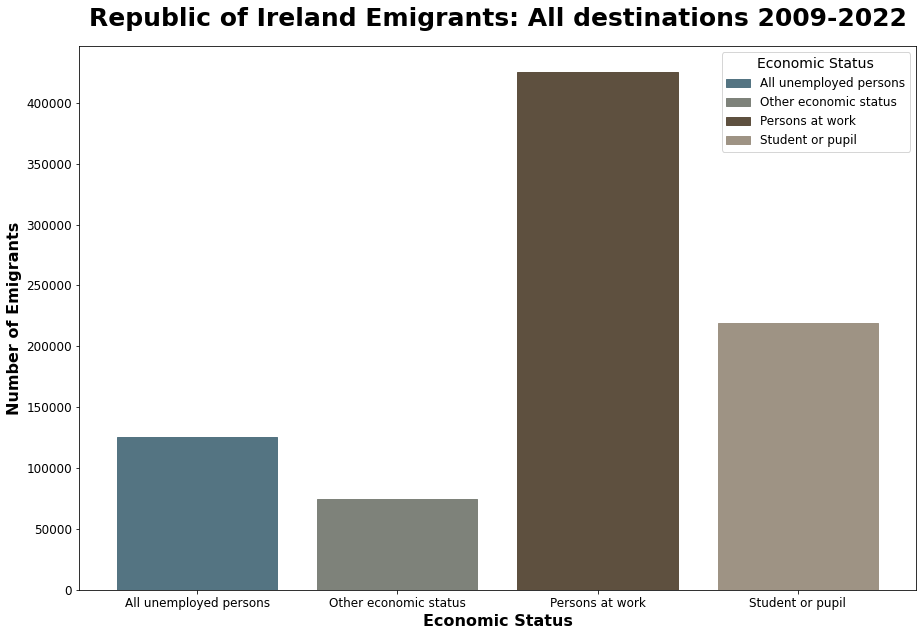

In [148]:
# summing up
pivot_df7absum = pivot_df7ab.sum()

categories = ['All unemployed persons', 'Other economic status', 'Persons at work', 'Student or pupil']
values_df7absum = pivot_df7absum.values

# friendly colors
coloring7ab = ['#547482', '#7E827A', '#5E503F', '#9E9384']


fig, ax = plt.subplots(figsize=(15, 10))
bars = ax.bar(categories, values_df7absum)

ax.set_xlabel('Economic Status', fontsize=16, fontweight="bold")
ax.set_ylabel('Number of Emigrants', fontsize=16, fontweight="bold")
ax.set_title('Republic of Ireland Emigrants: All destinations 2009-2022', loc="center", pad=20, fontsize=25, fontweight="bold")
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

# formating legend
for bar, color in zip(bars, coloring7ab):
    bar.set_color(color)
ax.legend(bars, categories,fontsize=12,title='Economic Status',title_fontsize=14)
plt.show()


In [149]:
pivot_df7absum

Economic_Status
All unemployed persons    125800.0
Other economic status      74900.0
Persons at work           425200.0
Student or pupil          219300.0
dtype: float64

In [150]:
pivot_df7b = df7b.pivot_table(index=['Year'],columns='Economic_Status', values='VALUE', aggfunc='sum').reset_index()
pivot_df7b.reset_index(inplace=True,drop=True)

In [151]:
pivot_df7bb = pivot_df7b.drop(columns=['Year'])

In [152]:
pivot_df7bb

Economic_Status,All unemployed persons,Other economic status,Persons at work,Student or pupil
0,15700.0,10100.0,33700.0,9800.0
1,8500.0,7000.0,18400.0,6100.0
2,9700.0,5200.0,23200.0,9000.0
3,10600.0,7900.0,23900.0,8200.0
4,8800.0,7000.0,26200.0,13000.0
5,7700.0,8300.0,25600.0,18400.0
6,6800.0,9900.0,32000.0,17300.0
7,10100.0,8200.0,41100.0,13100.0
8,5700.0,12500.0,42100.0,15400.0
9,9000.0,12800.0,48700.0,9300.0


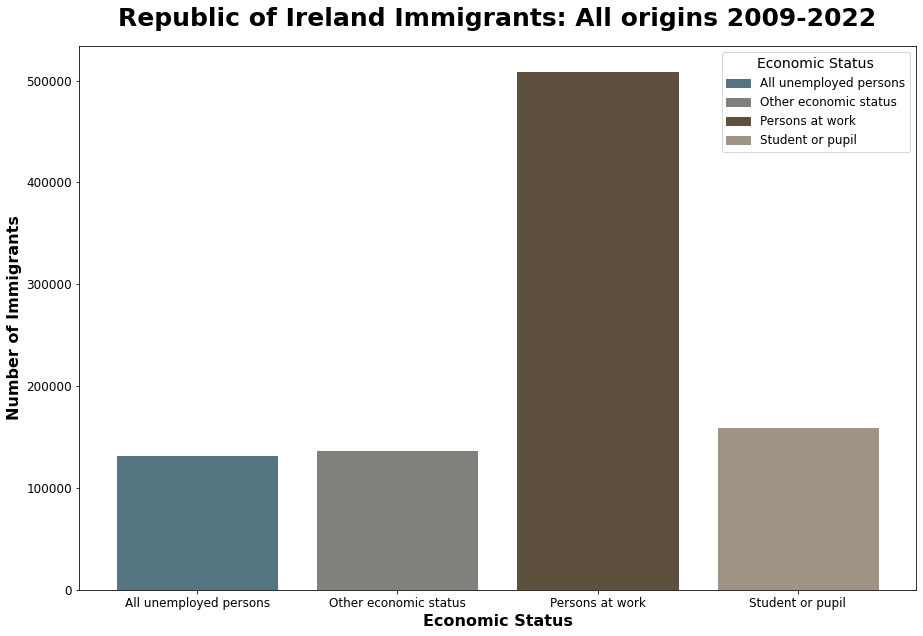

In [153]:
# summing up
pivot_df7bbsum = pivot_df7bb.sum()

categories = ['All unemployed persons', 'Other economic status', 'Persons at work', 'Student or pupil']
values_df7bbsum = pivot_df7bbsum.values

# friendly colors
coloring7bb = ['#547482', '#7E827A', '#5E503F', '#9E9384']

fig, ax = plt.subplots(figsize=(15, 10))
bars = ax.bar(categories, values_df7bbsum )

ax.set_xlabel('Economic Status', fontsize=16, fontweight="bold")
ax.set_ylabel('Number of Immigrants', fontsize=16, fontweight="bold")
ax.set_title('Republic of Ireland Immigrants: All origins 2009-2022', loc="center", pad=20, fontsize=25, fontweight="bold")
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

# formating legend
for bar, color in zip(bars, coloring7bb):
    bar.set_color(color)
ax.legend(bars, categories,fontsize=12,title='Economic Status',title_fontsize=14)
plt.show()

In [154]:
pivot_df7bbsum

Economic_Status
All unemployed persons    131000.0
Other economic status     136500.0
Persons at work           508300.0
Student or pupil          158800.0
dtype: float64